## Project Objective

The goal of this project is to utilize data science methodologies on a semiconductor manufacturing dataset. The analysis will focus on extracting valuable insights and identifying possible applications based on the data.

This dataset, named `uci-secom.csv`, is obtained from Kaggle and will be the cornerstone of our exploration.

I would like to express my profound gratitude for the access to this dataset, as it provides an excellent opportunity to apply the skills and knowledge gained from USC.

I will conclude this project with providing a well designed machine learning classification model to make defection detection.


# Import Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

Upon examining the dataset, it is noted that it includes a 'Time' column, a total of 590 features numbered from 0 to 589, and a 'label' column which indicates the results for the product.


In [2]:
data = pd.read_csv('uci-secom.csv')
data

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.0400,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0

Upon reviewing the values in the Pass/Fail column, it becomes evident that if this project aims to develop a predictive model, there is an issue of imbalanced data that needs addressing. Without intervention, the machine learning model could exhibit high precision but low recall, potentially compromising its effectiveness.

According to the data description, a value of 1 indicates a failure, while -1 denotes a pass.


In [3]:
# According to data description, 1 represents fail and -1 represents pass.
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

Certain machine learning algorithms necessitate that the target label begins at 0, which the current dataset's labels of -1 and 1 do not satisfy. Therefore, I have modified the values to 0 (for pass cases) and 1 (for fail cases) to meet this requirement.


In [4]:
# Change the data value into more intuitive format, and I make -1 as 0 because I focus on 1(fail case)
data['Pass/Fail'] = data['Pass/Fail'].replace({-1: 0})

In [5]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Data Exploration and Analysis

## Data Visualization

### Look for outliners for 590 features

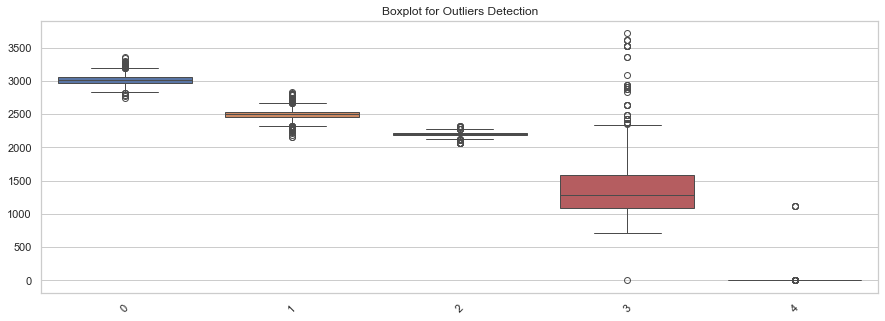

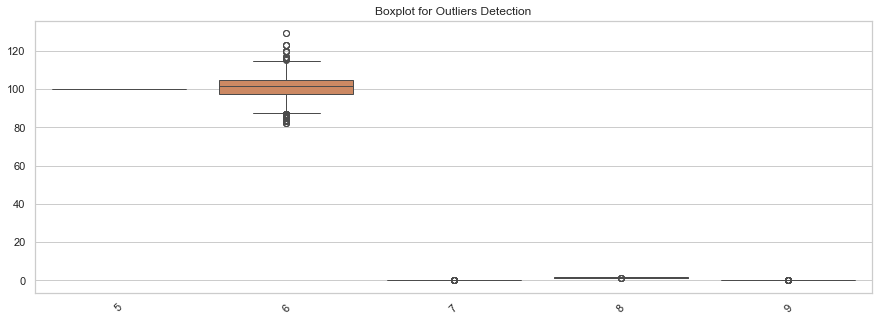

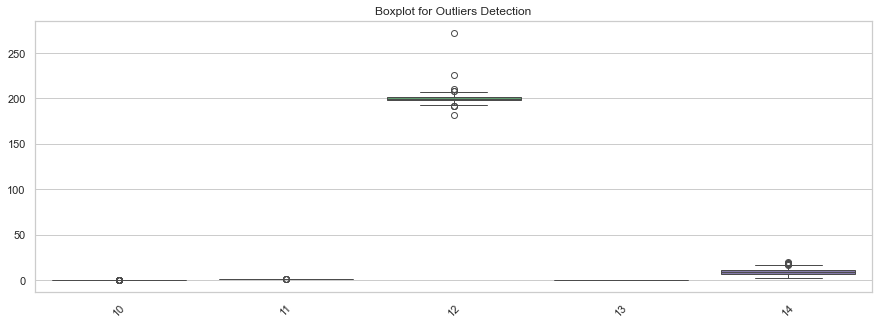

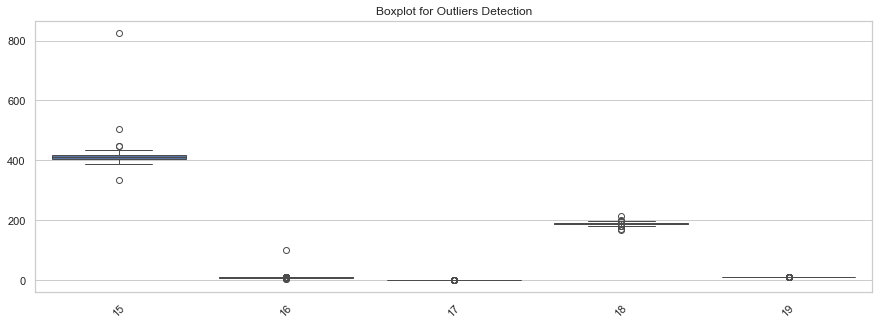

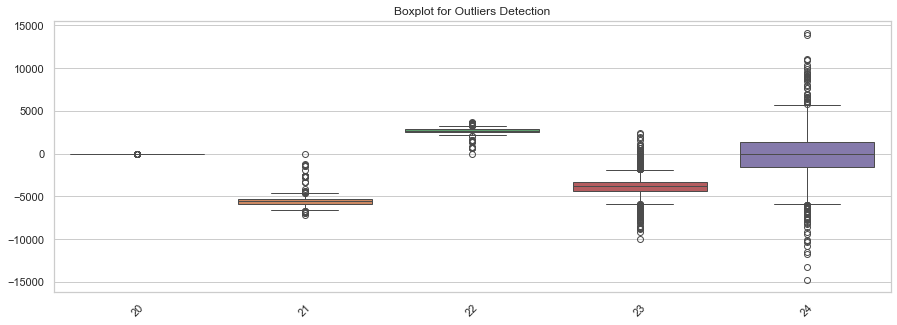

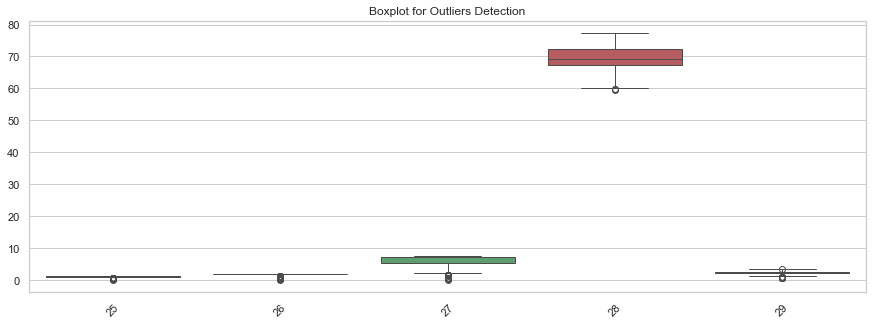

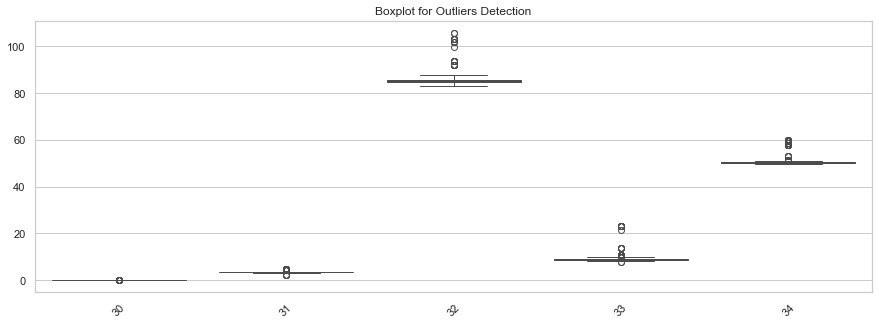

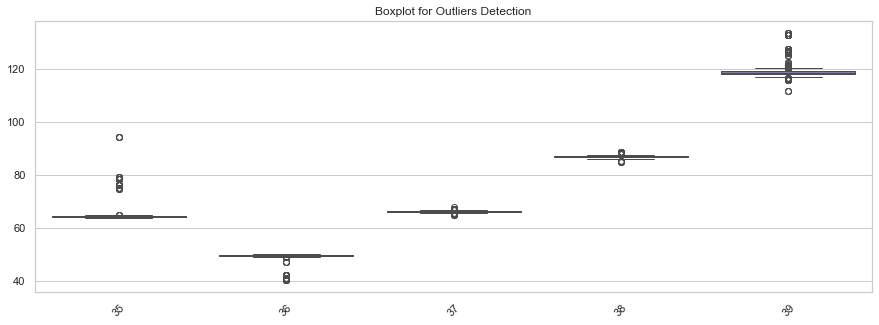

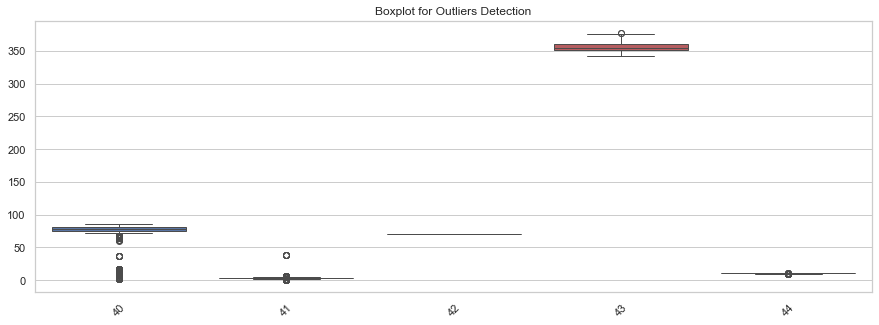

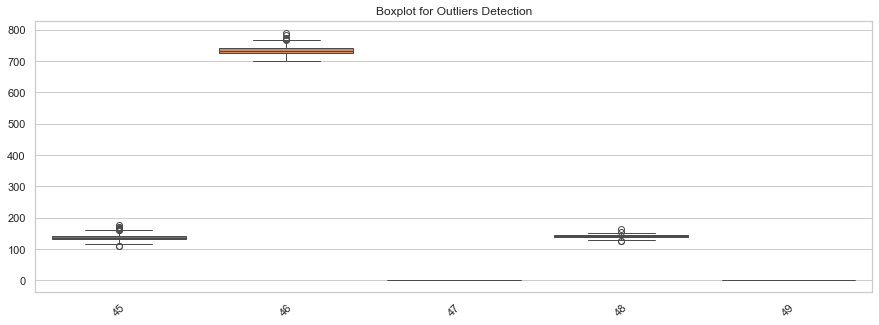

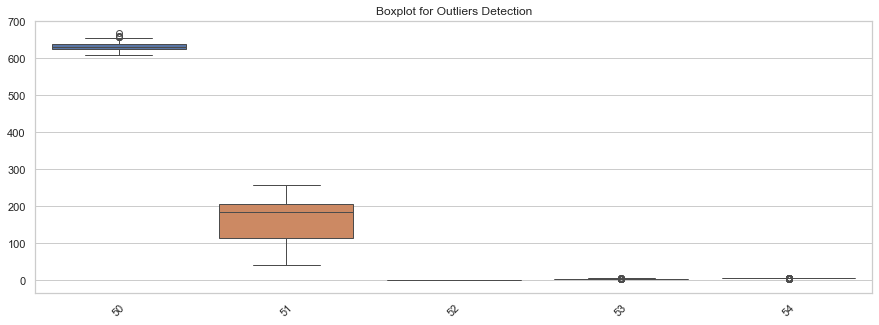

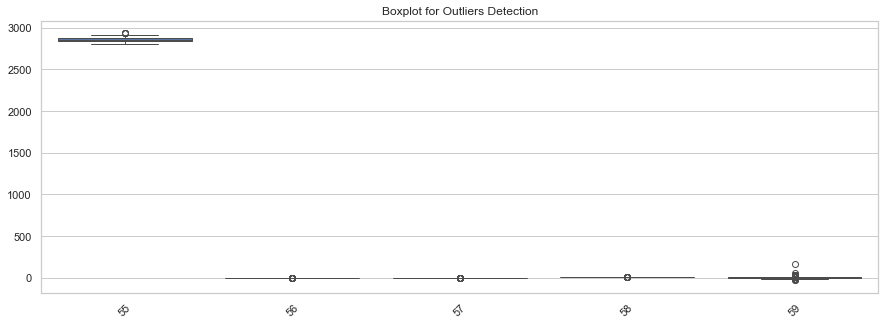

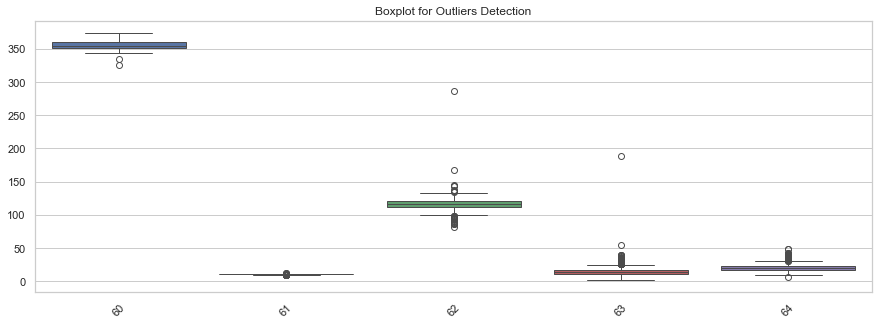

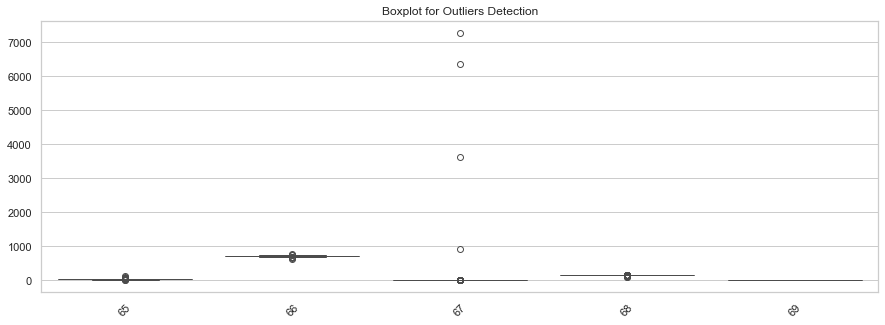

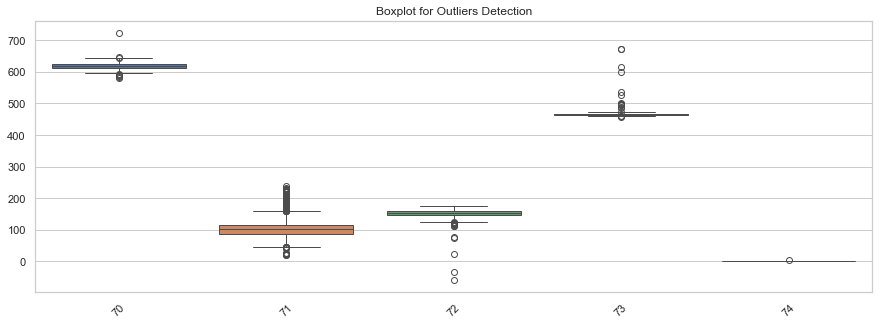

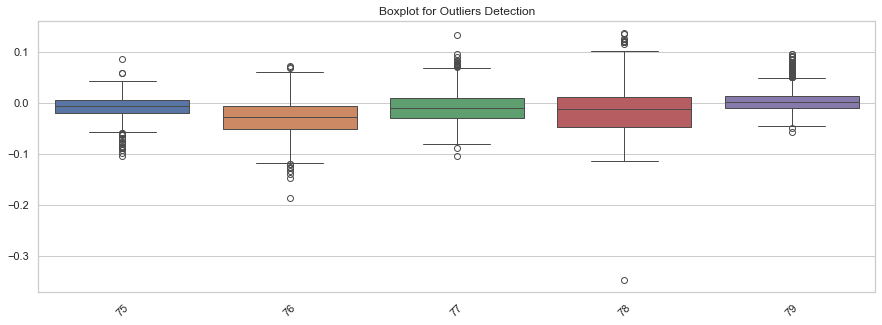

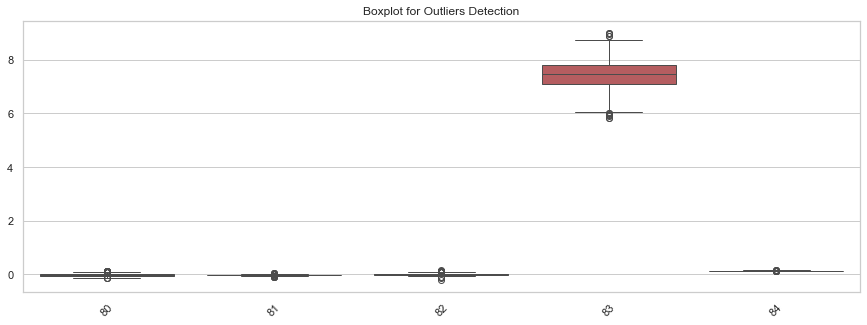

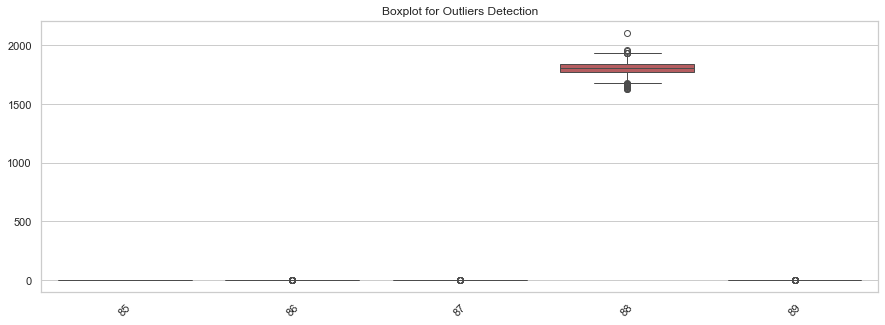

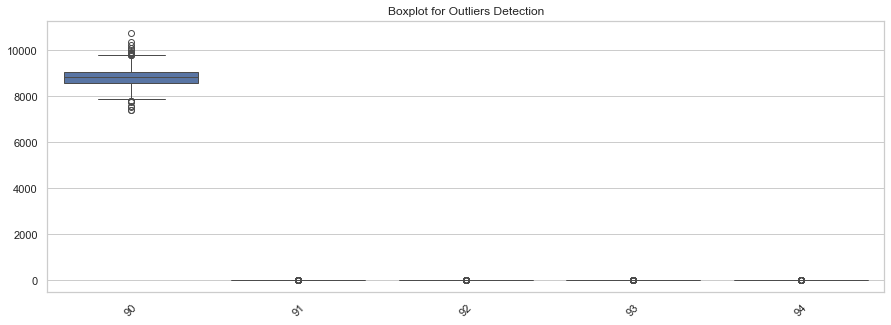

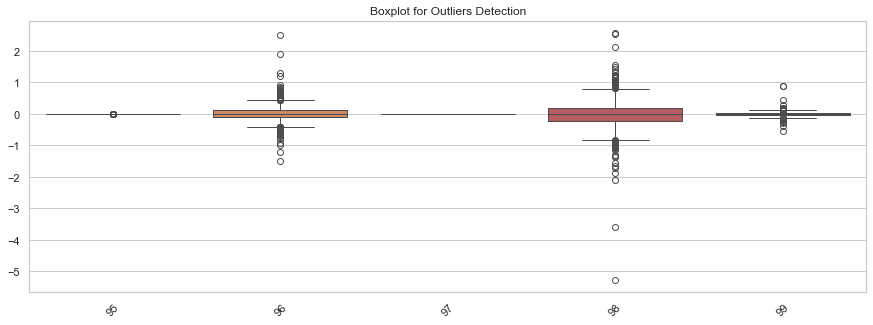

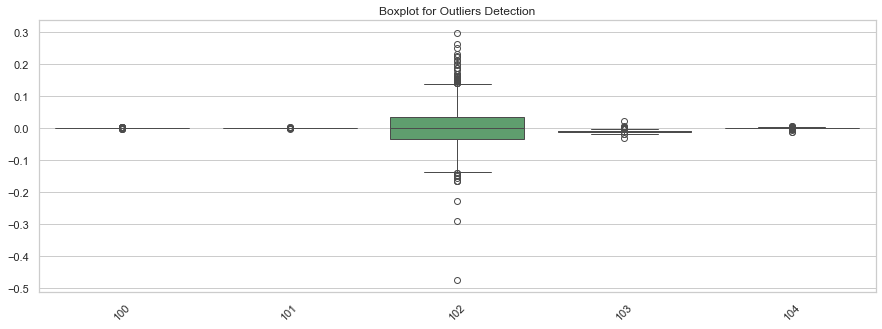

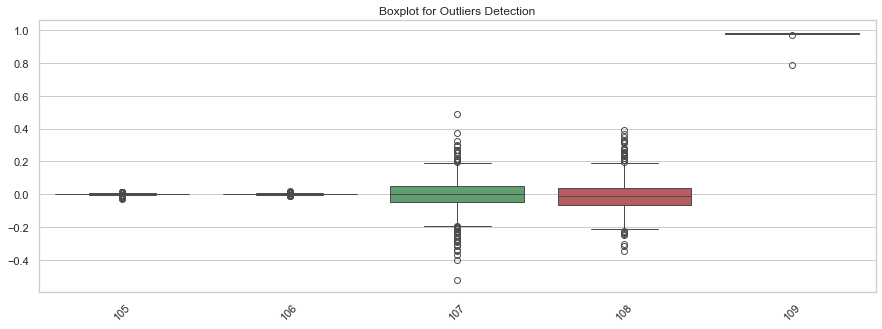

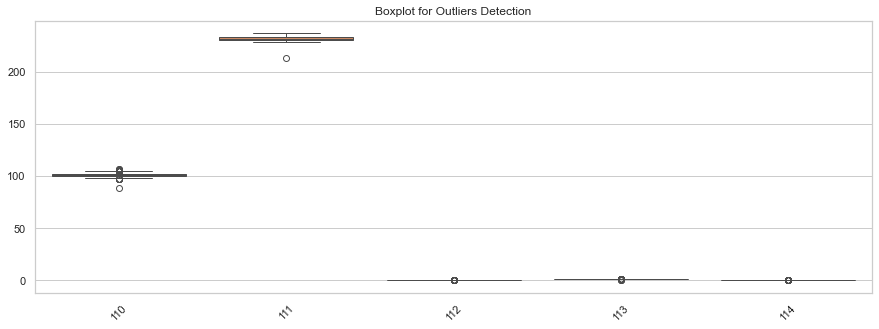

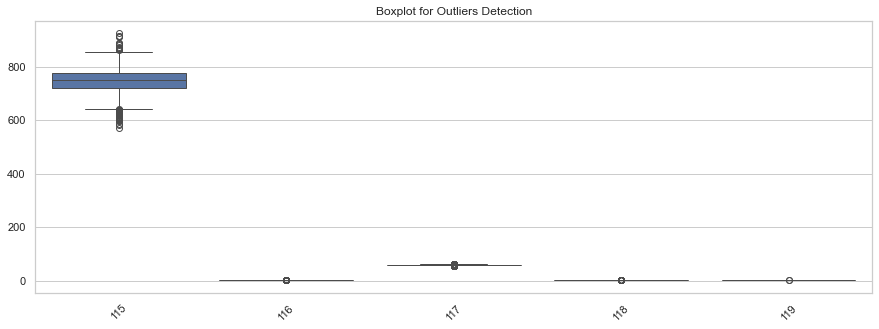

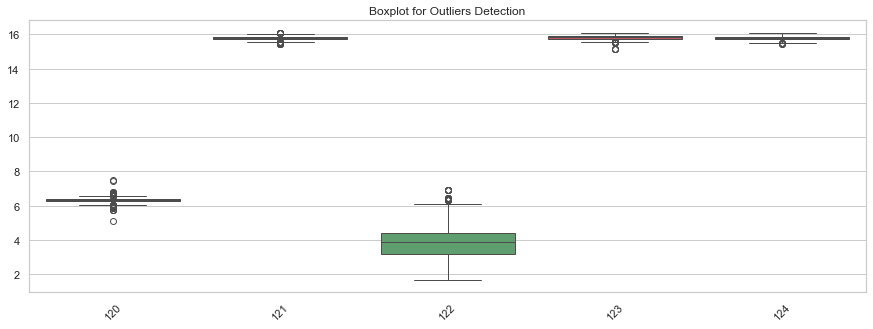

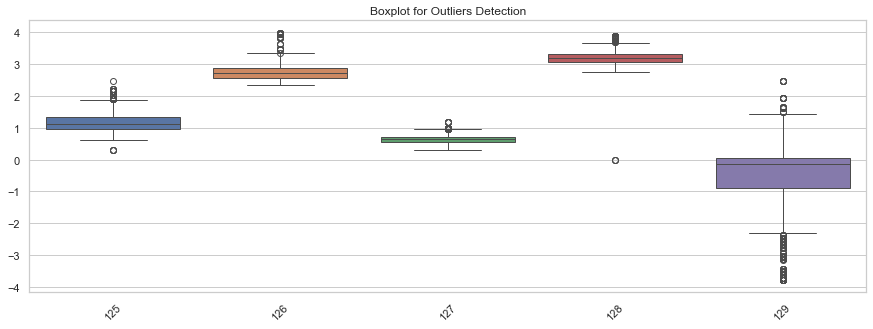

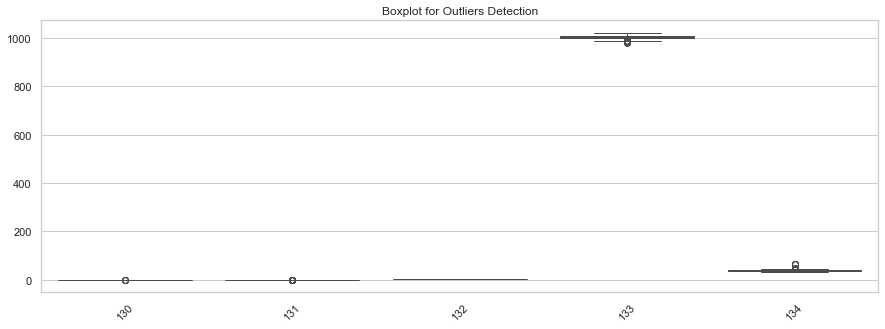

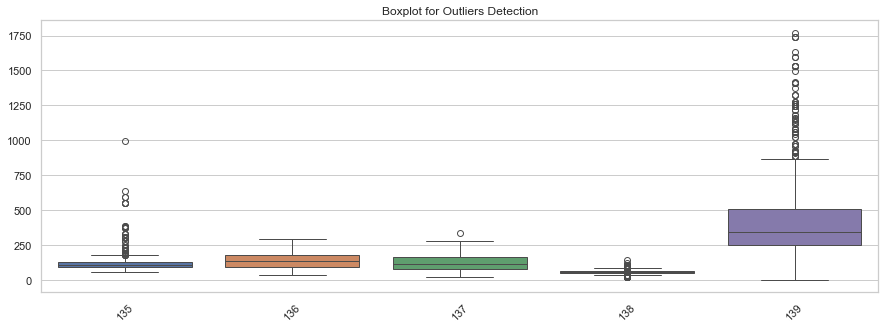

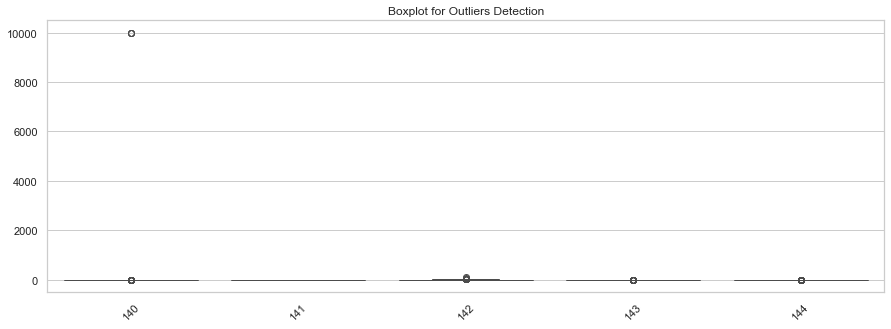

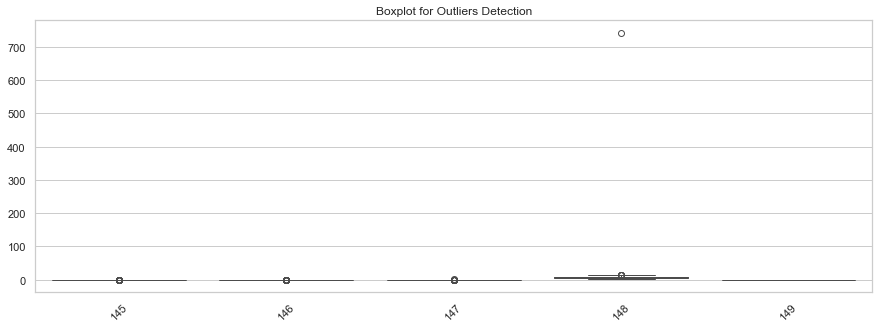

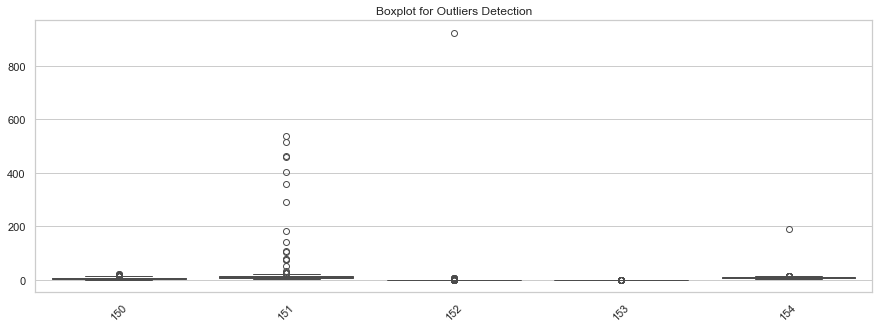

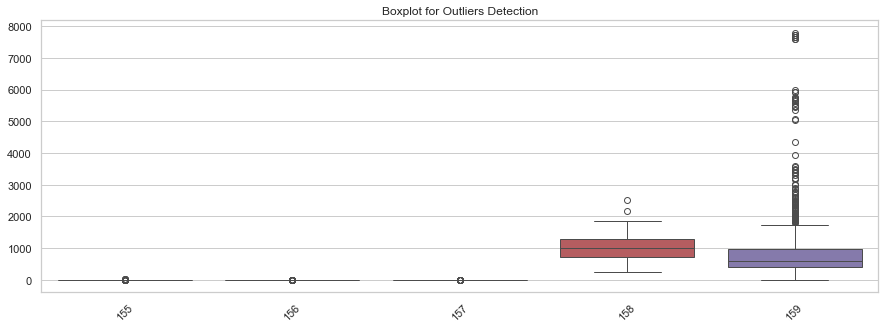

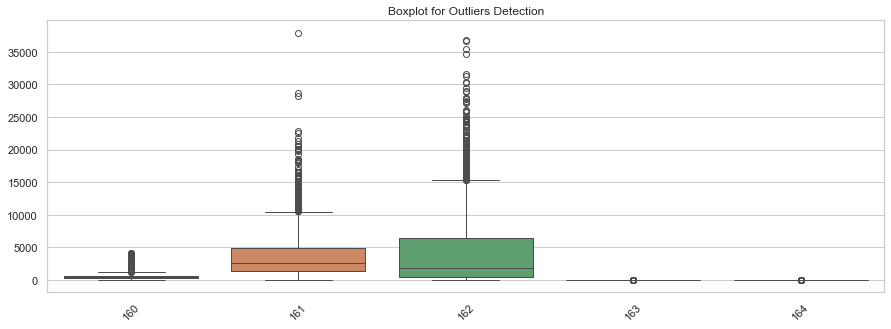

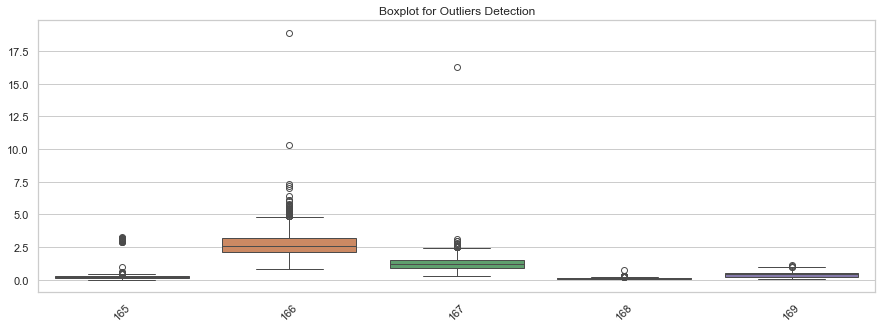

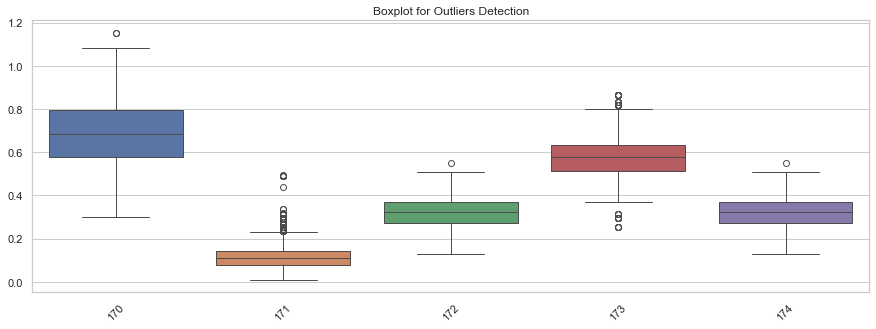

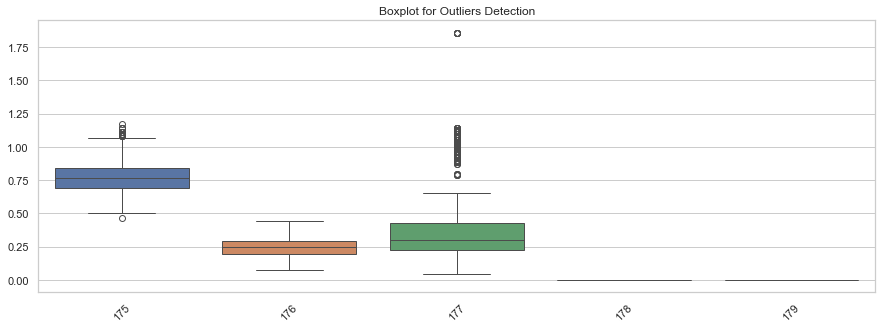

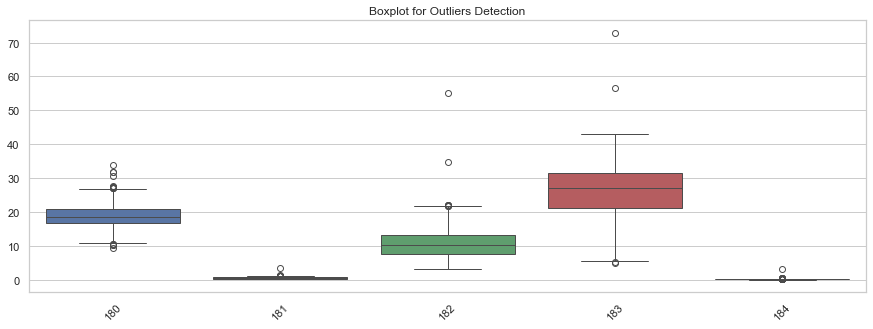

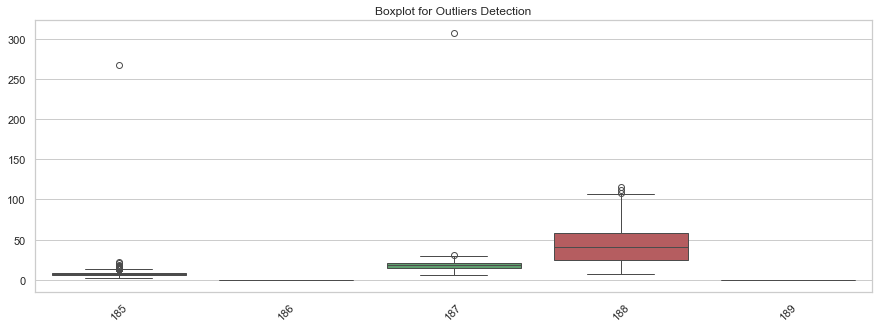

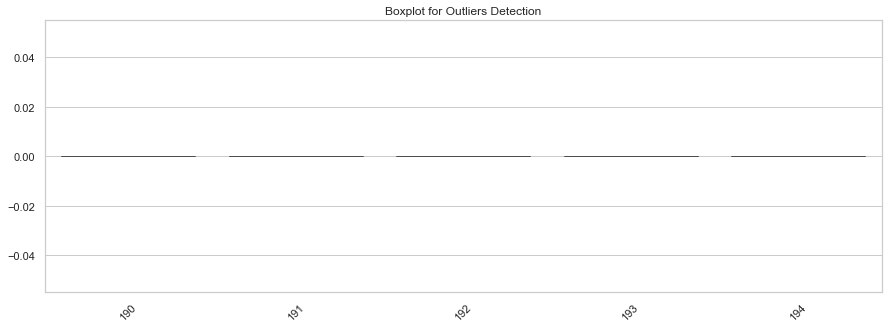

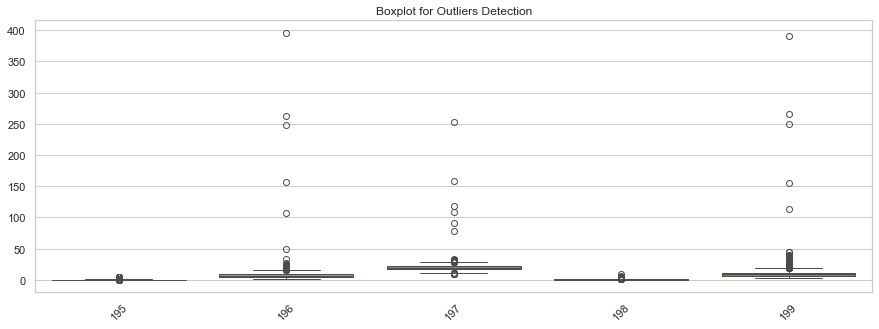

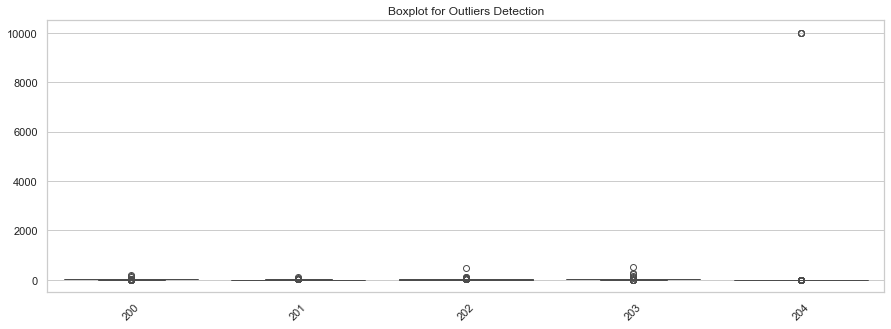

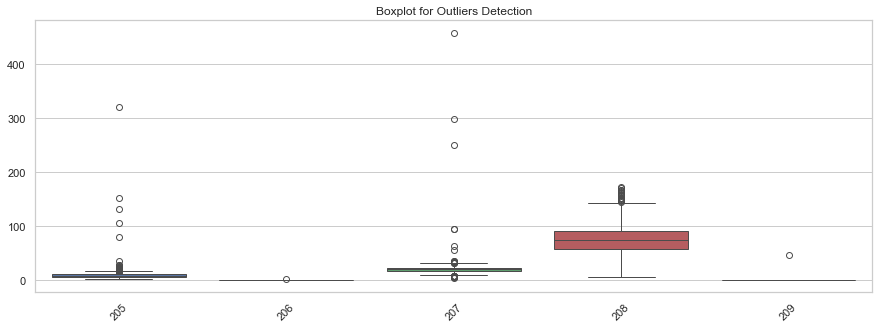

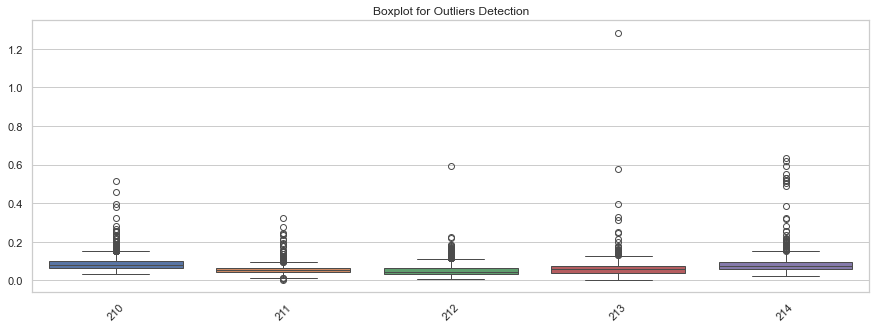

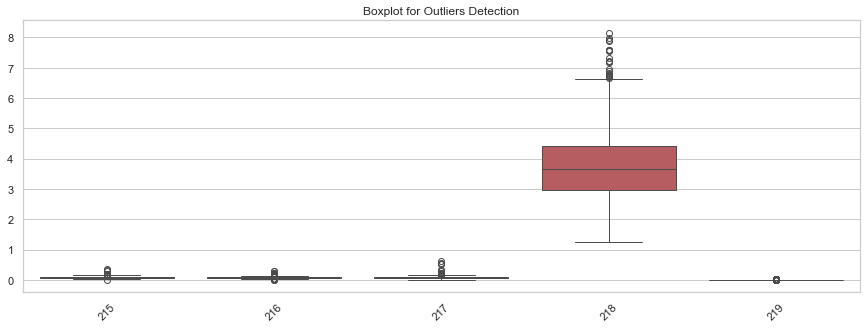

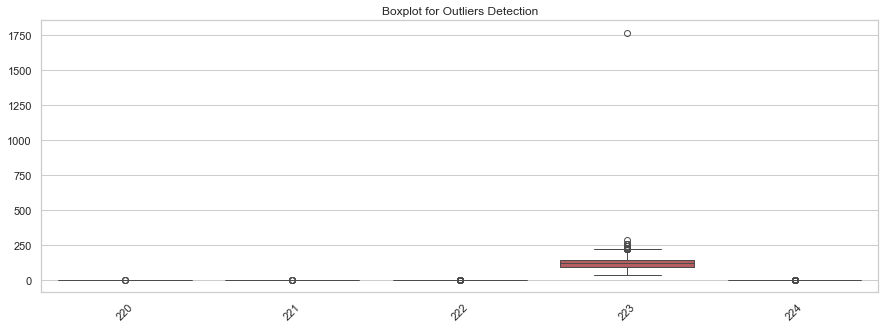

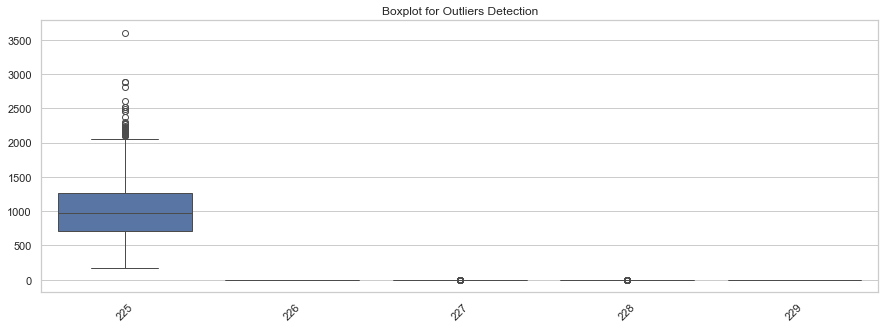

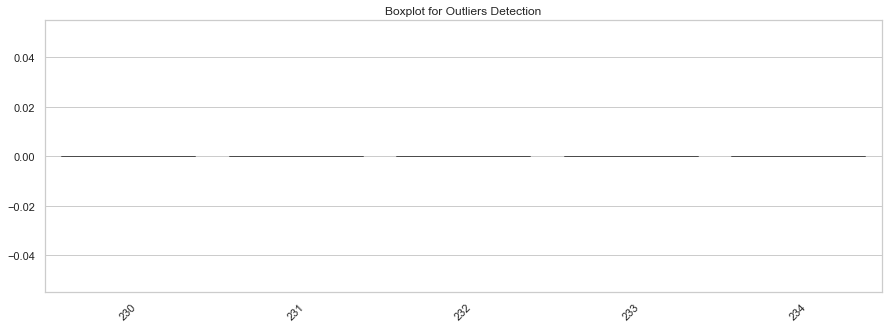

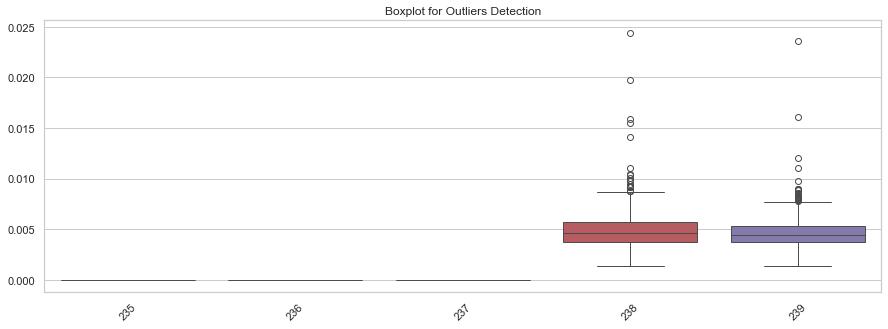

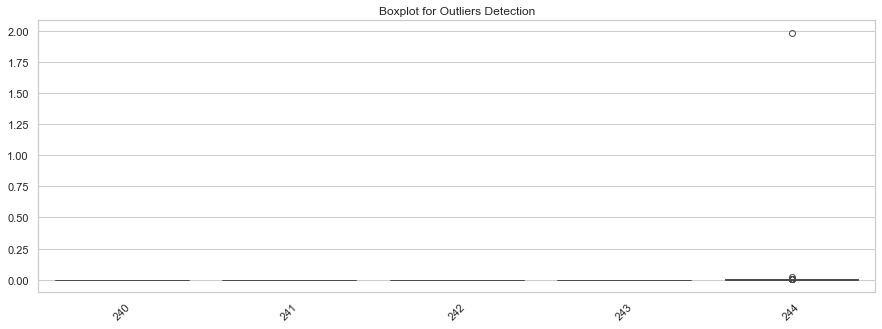

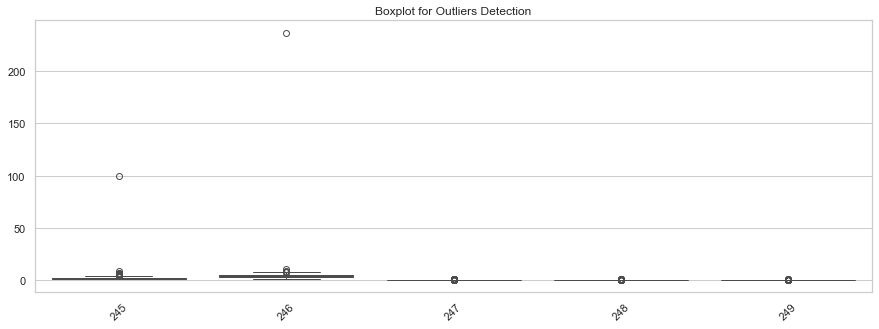

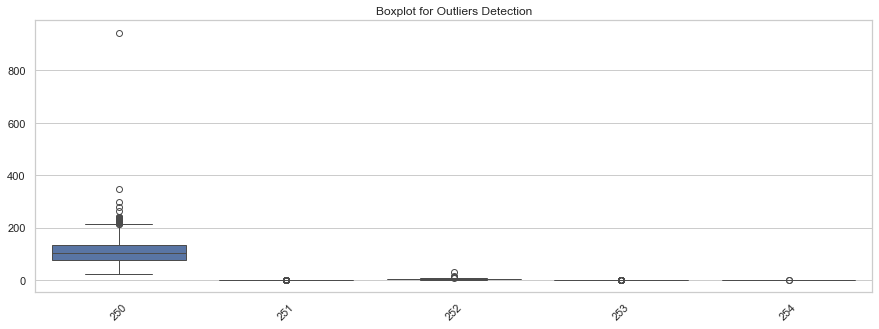

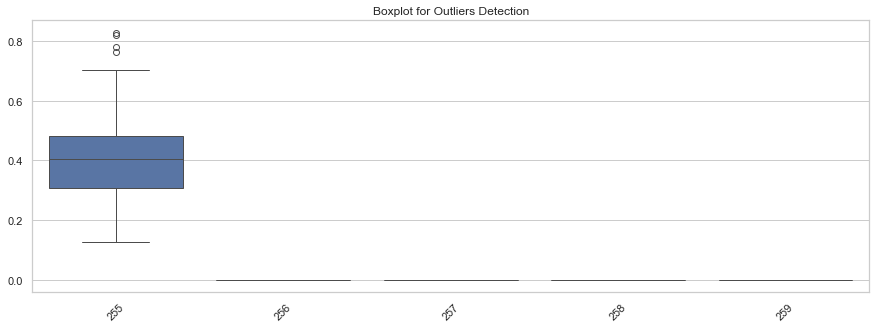

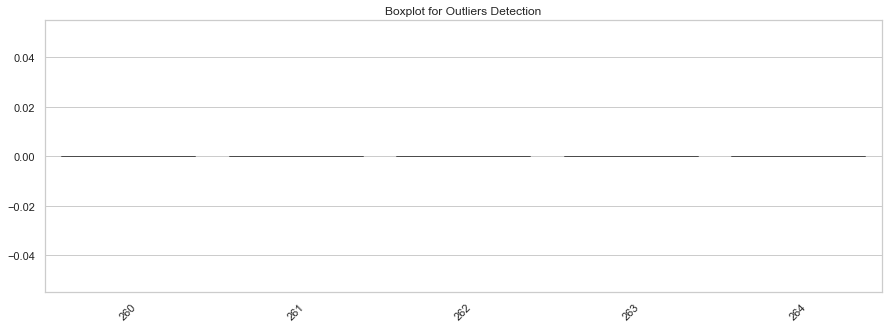

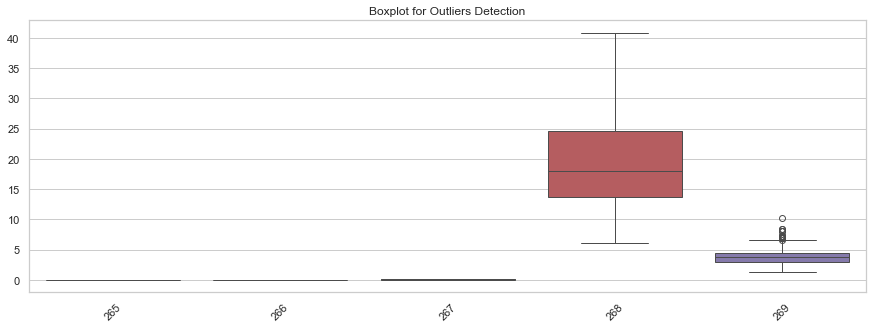

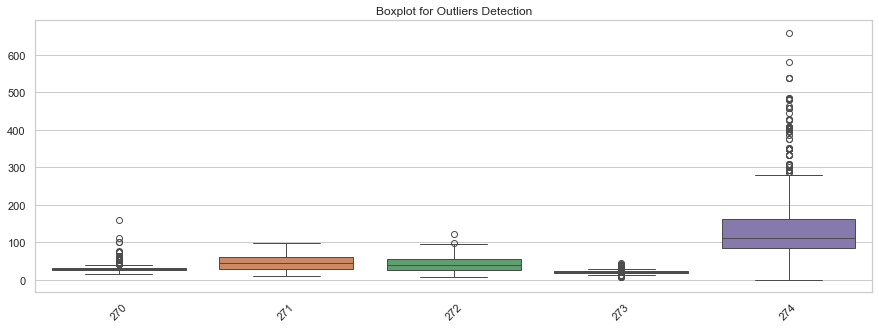

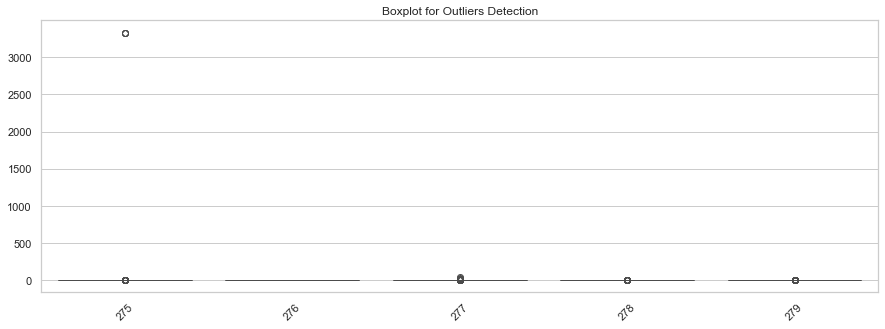

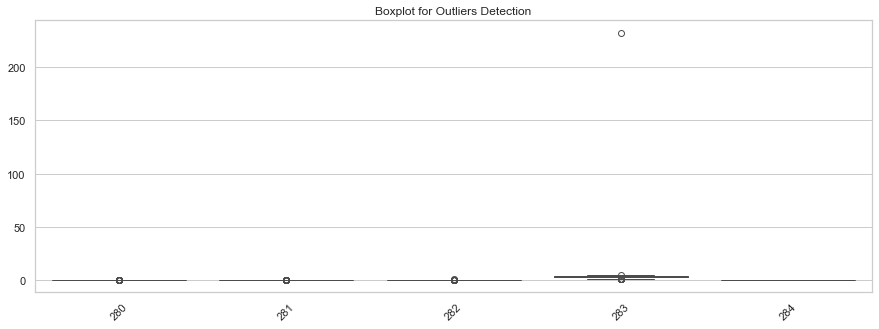

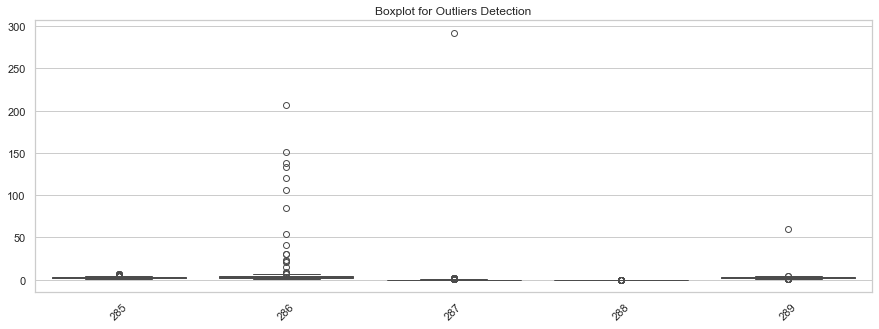

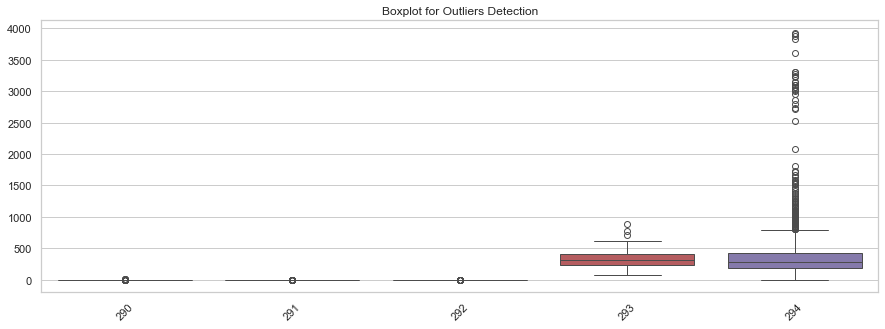

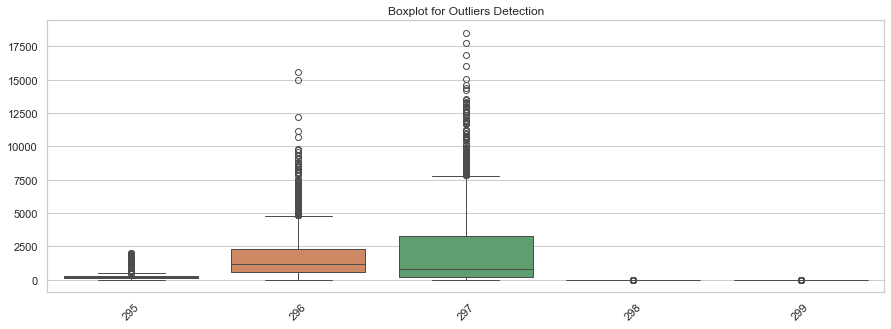

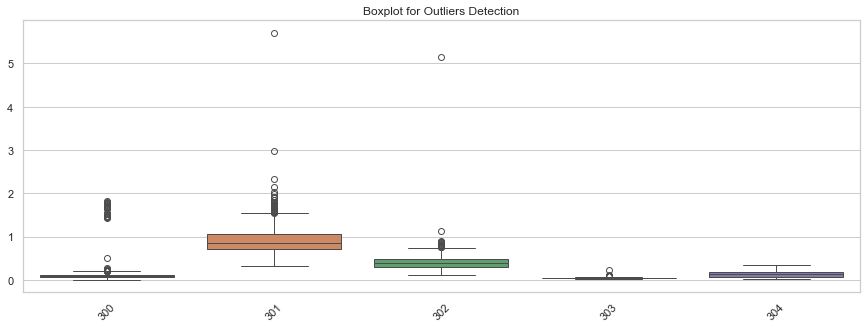

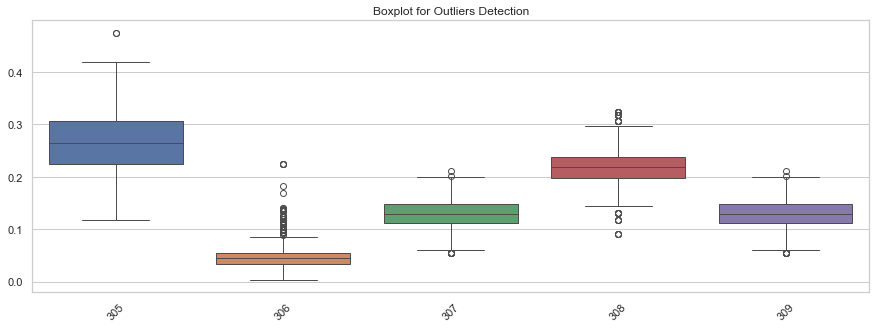

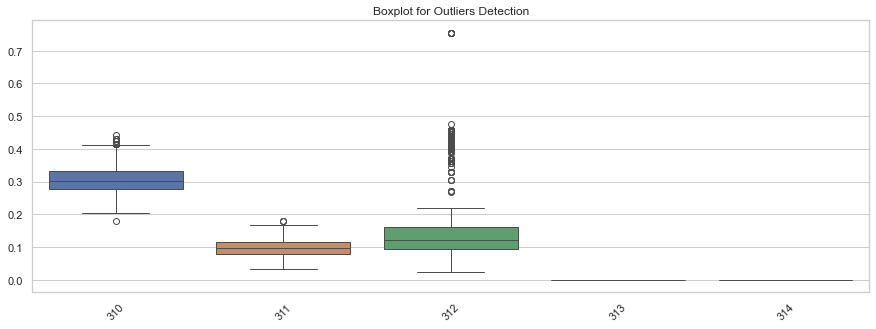

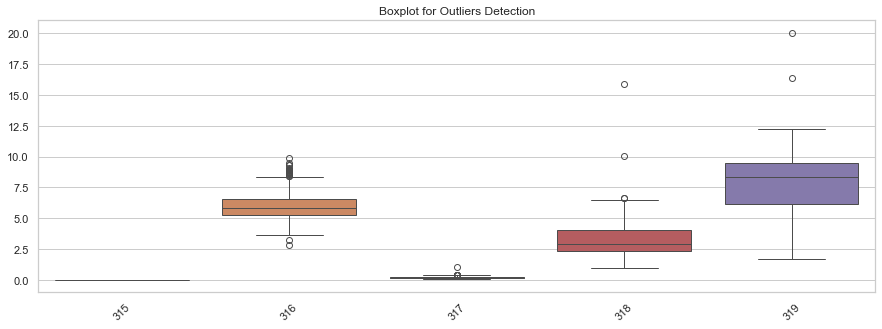

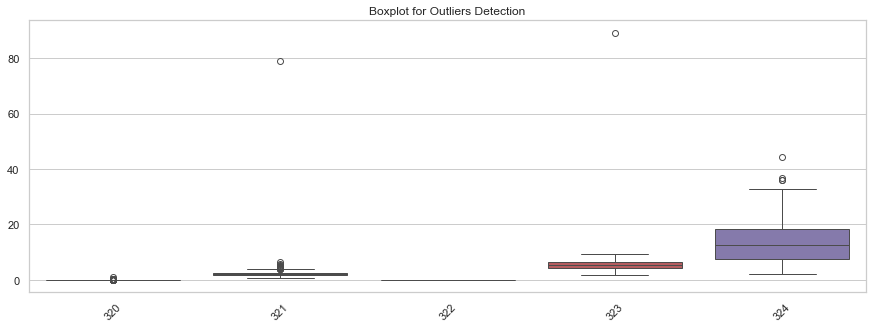

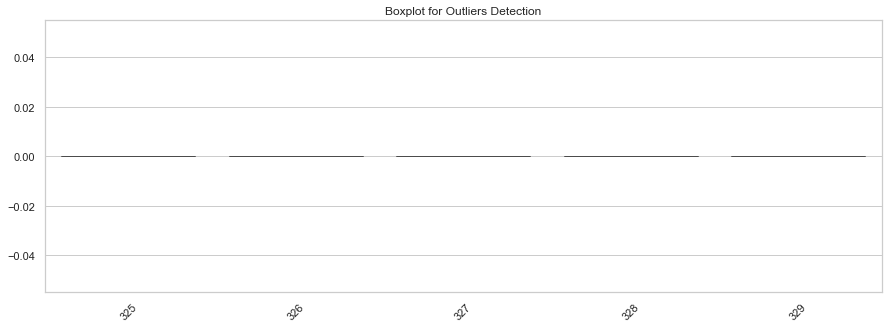

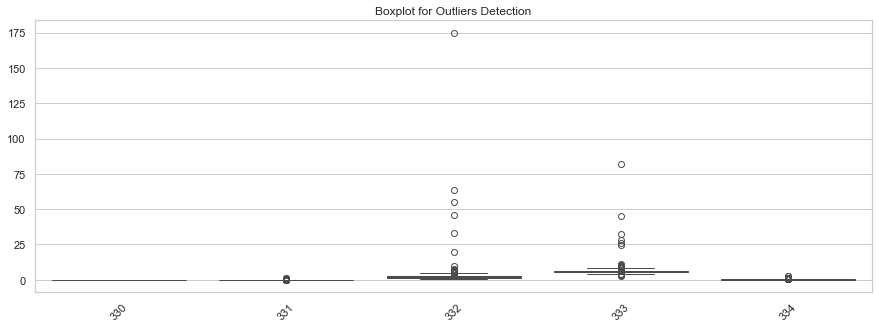

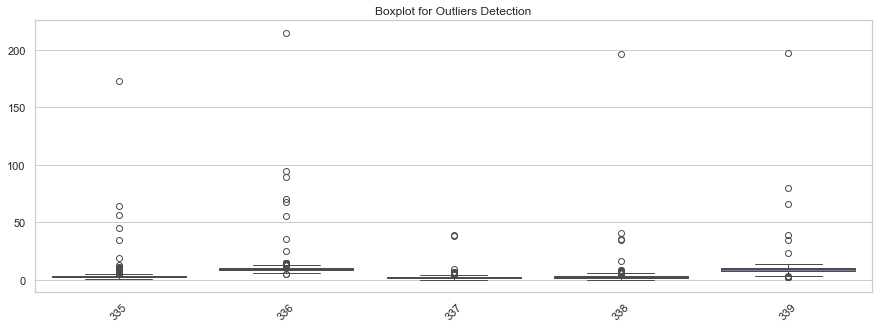

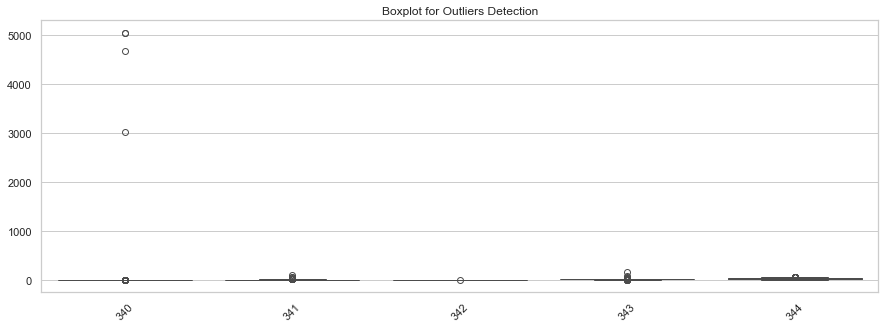

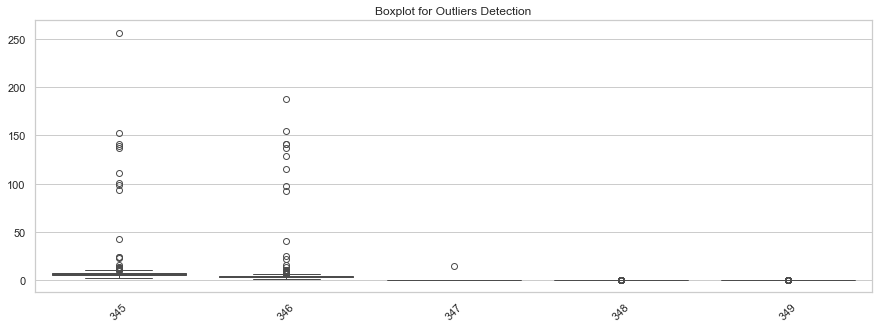

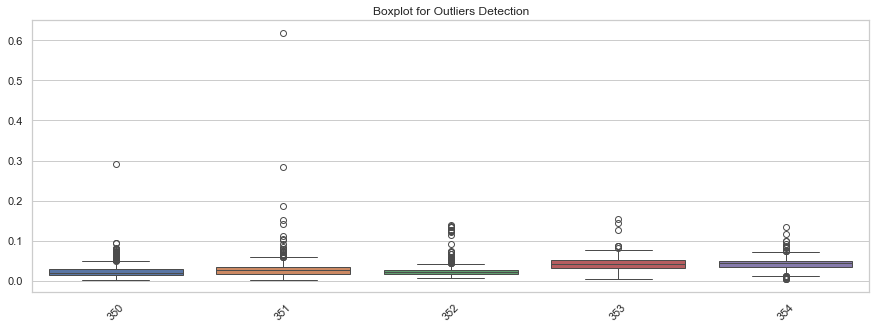

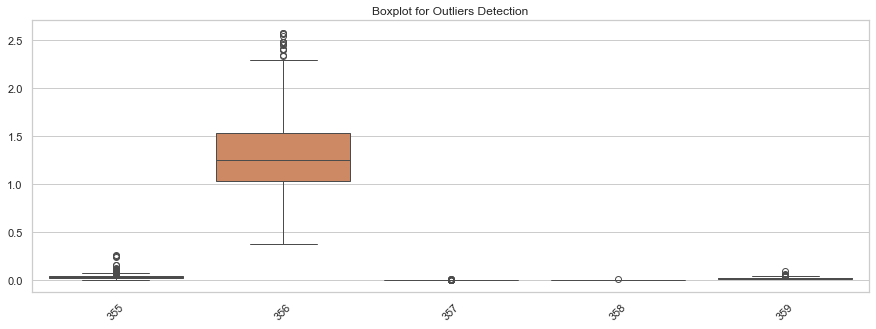

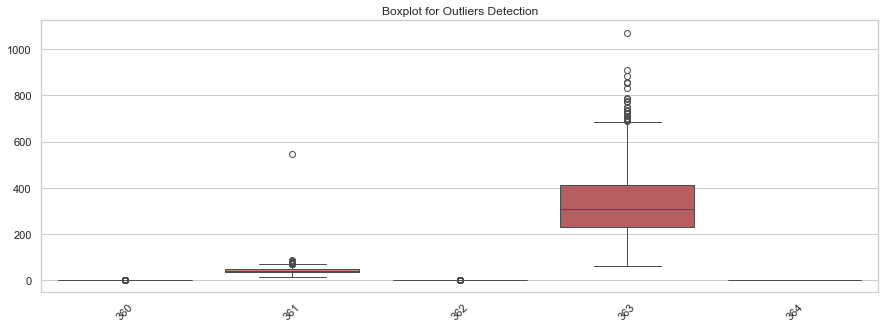

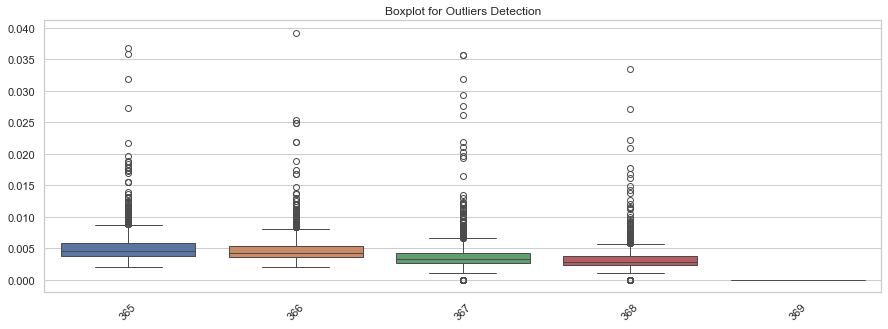

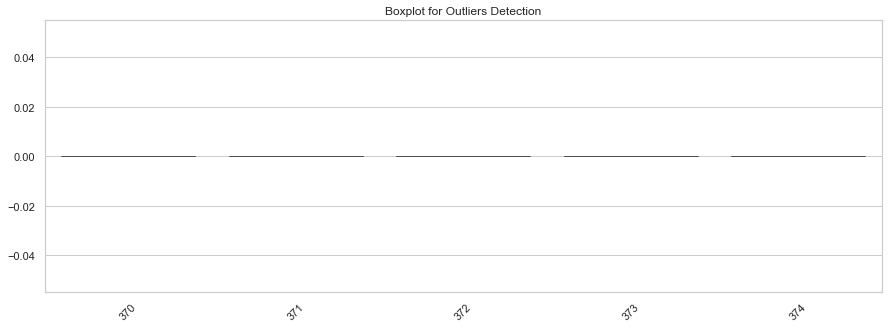

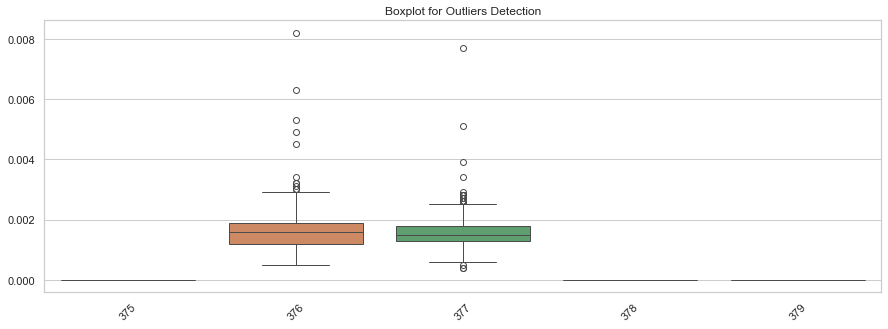

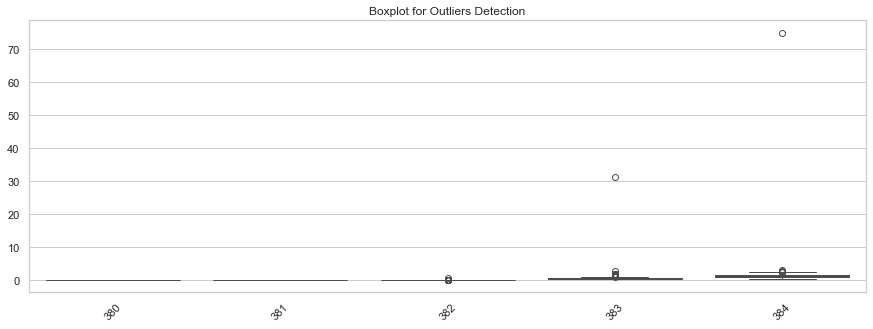

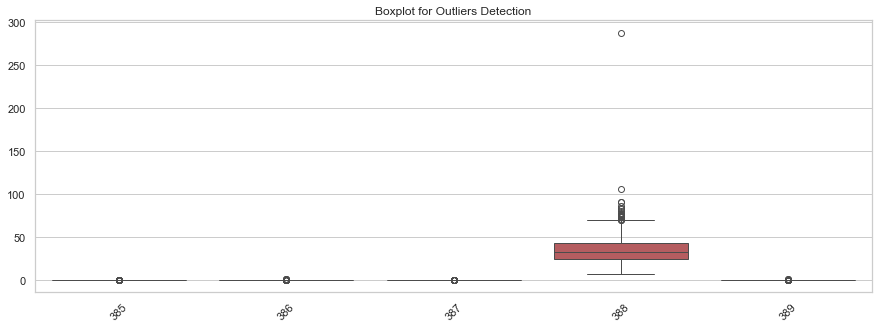

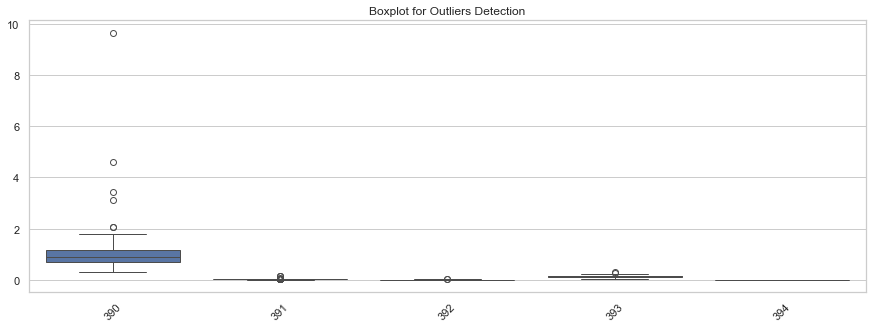

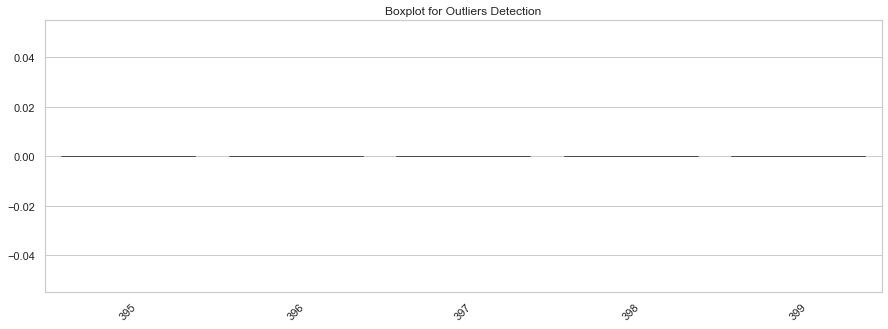

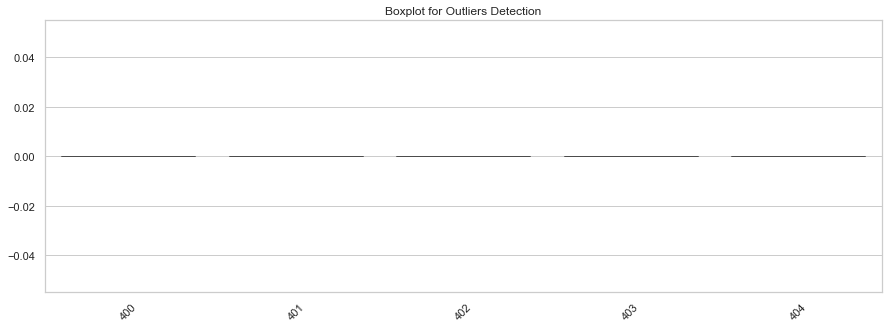

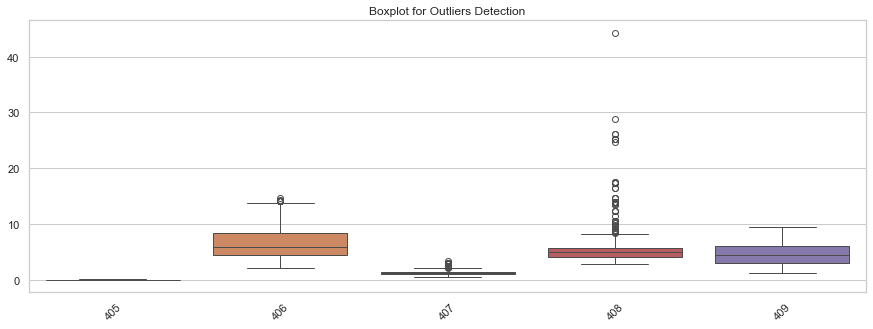

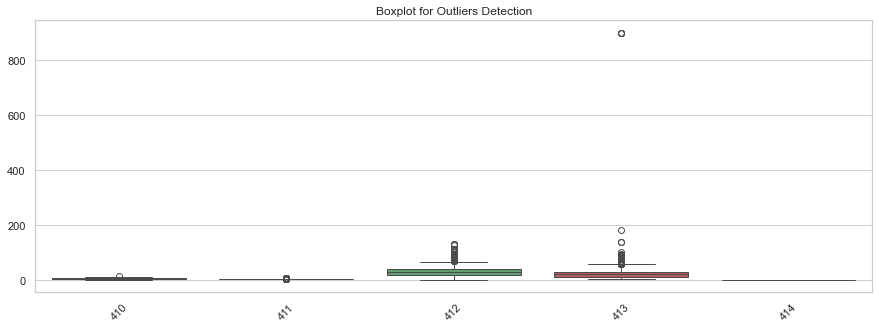

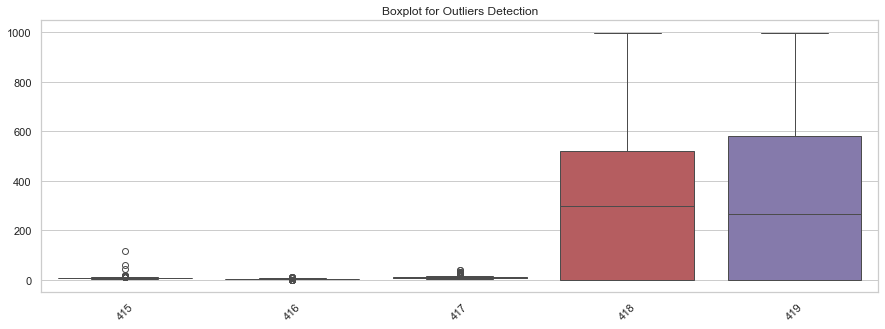

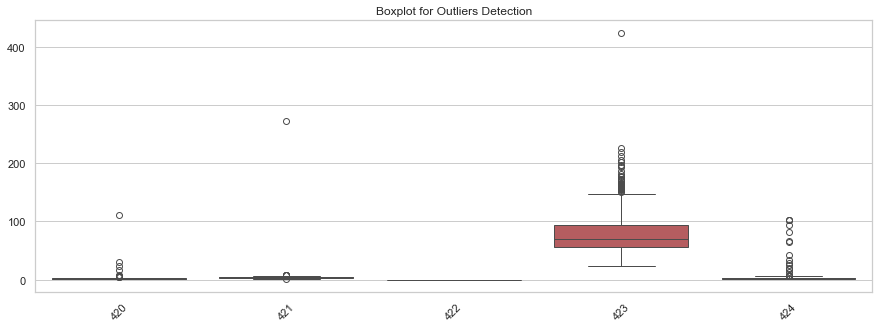

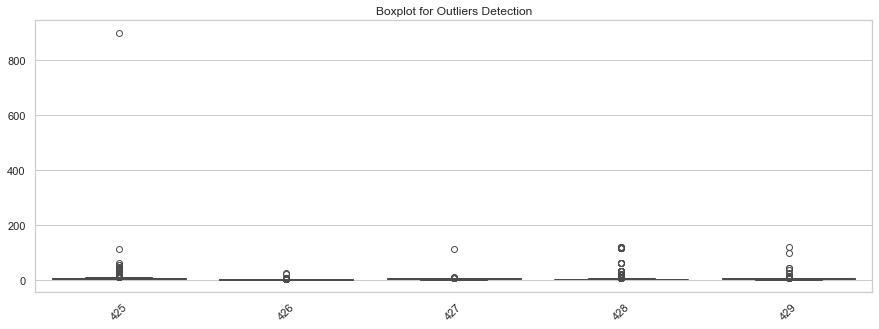

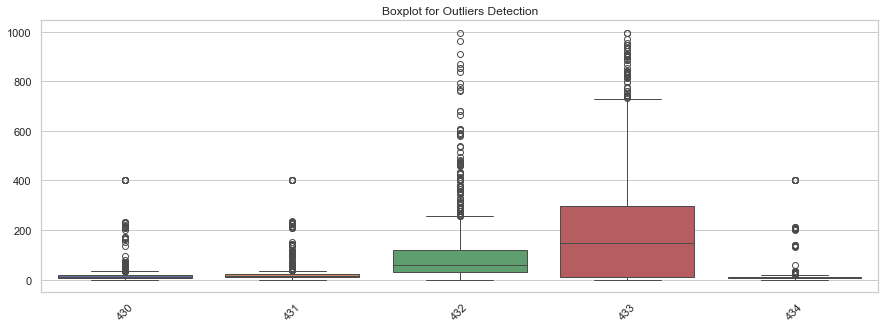

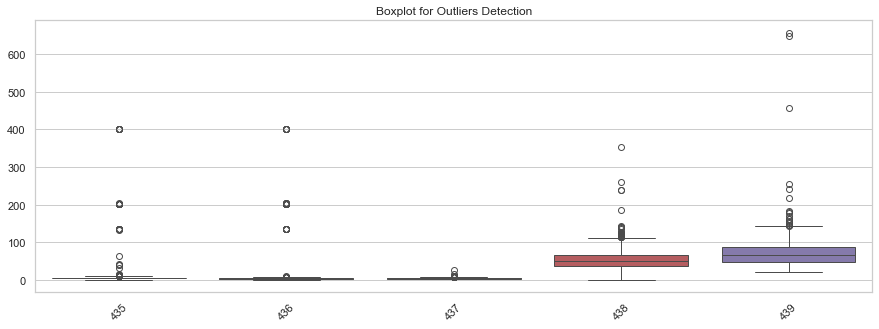

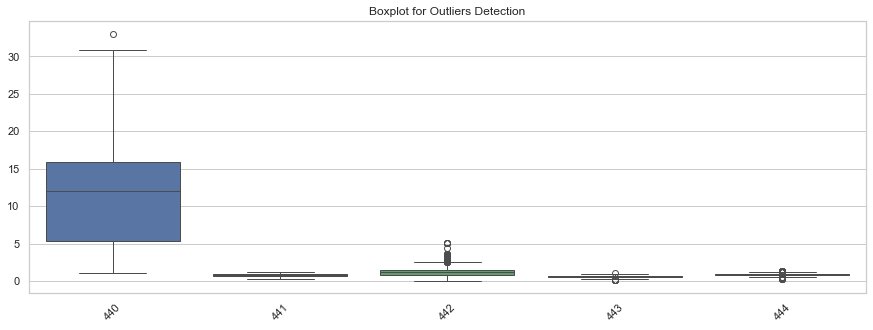

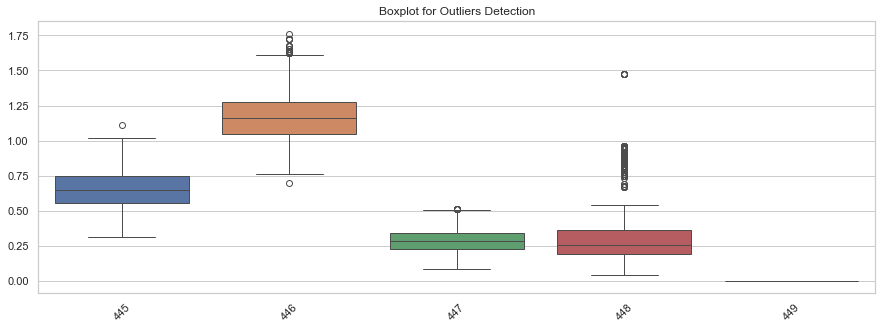

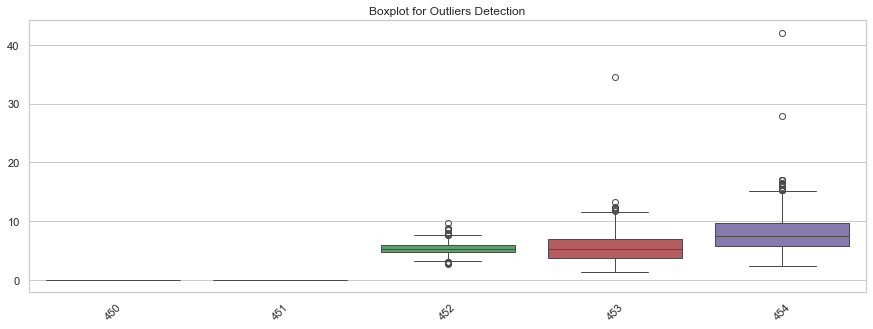

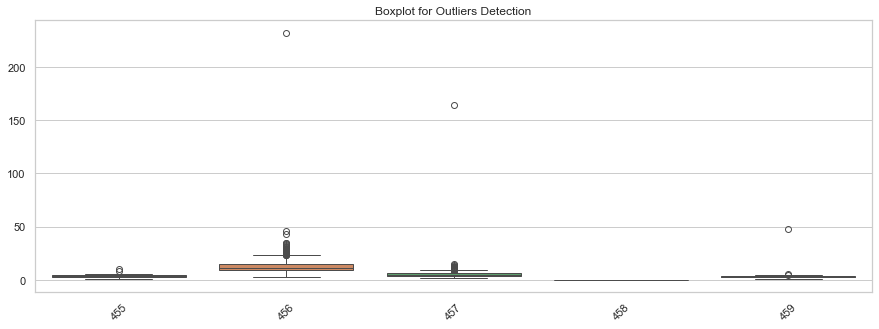

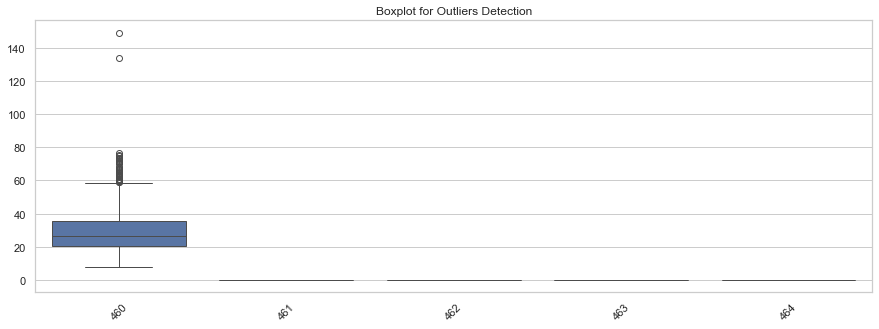

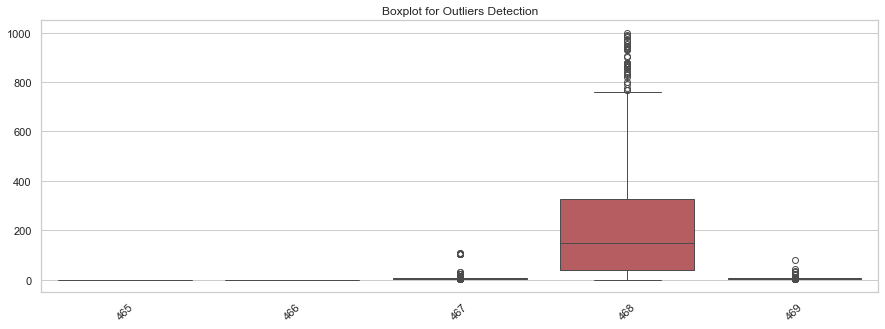

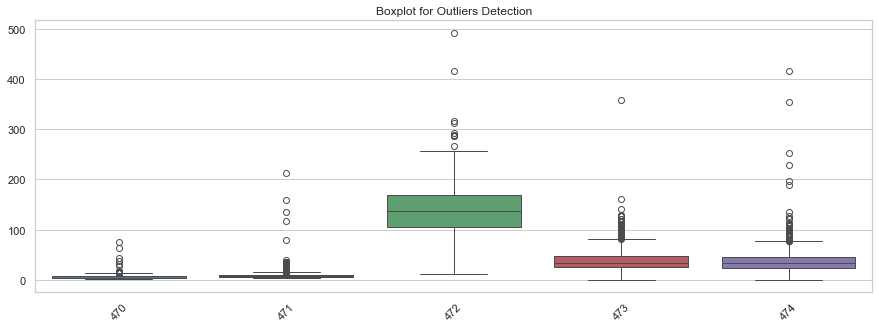

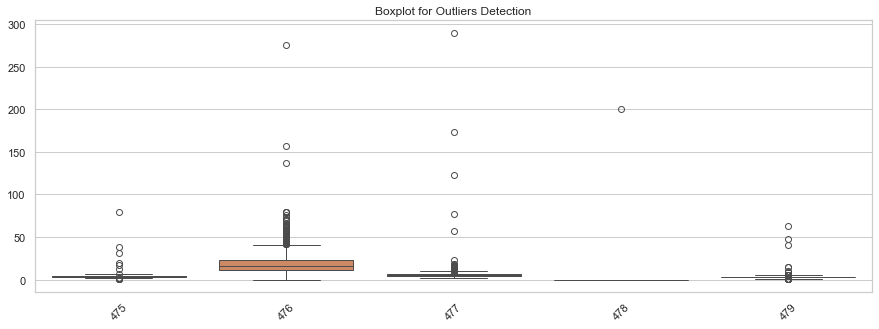

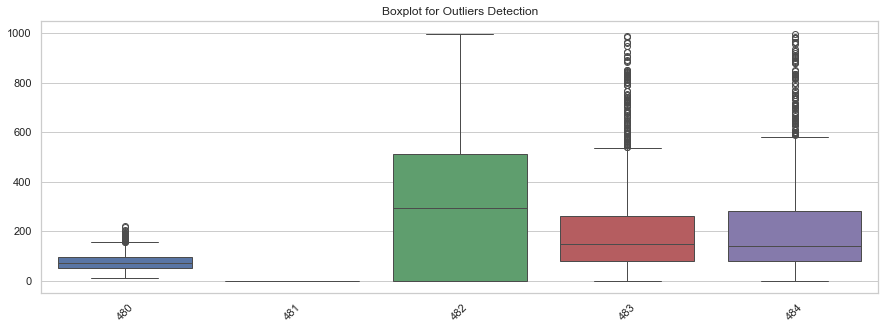

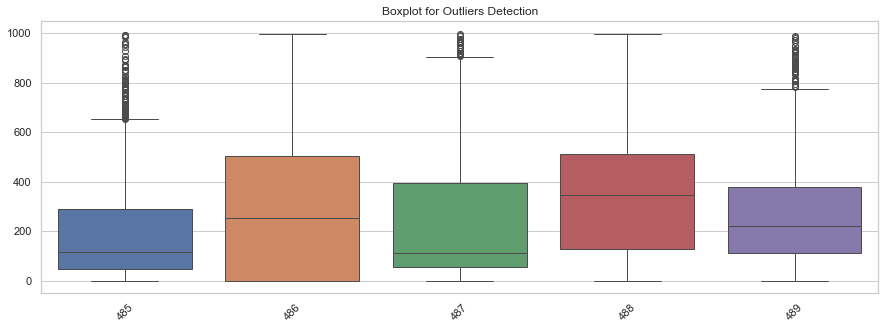

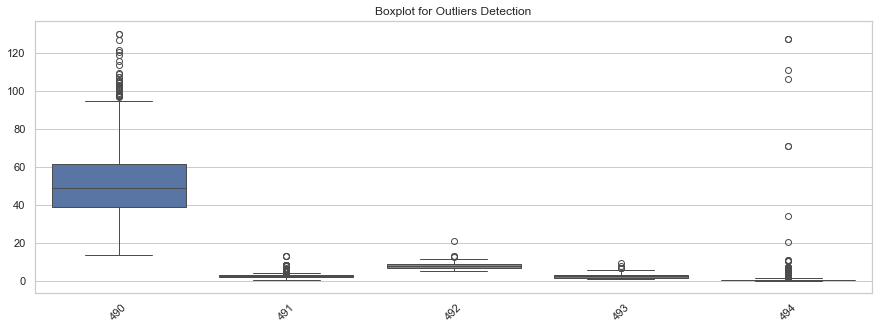

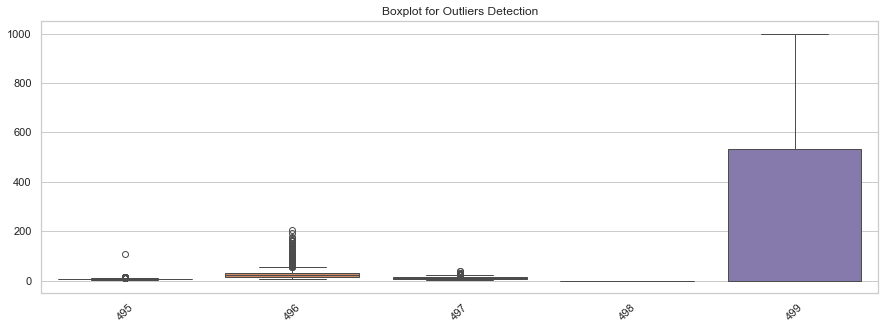

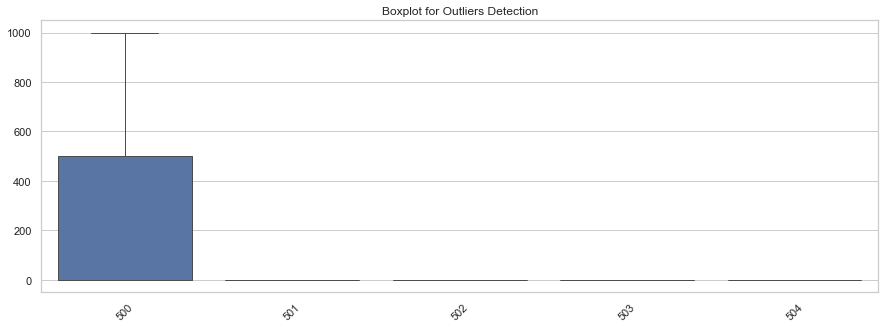

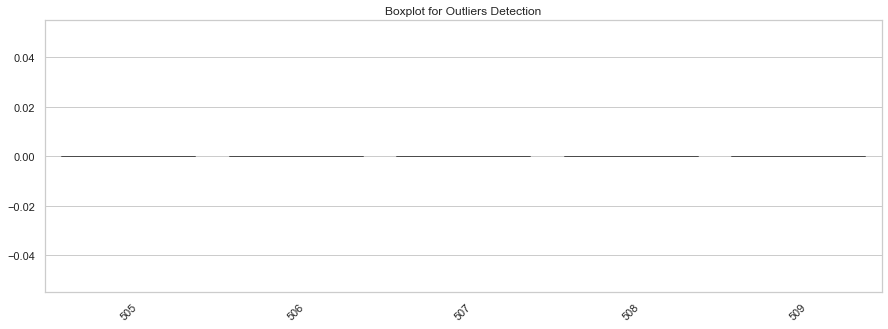

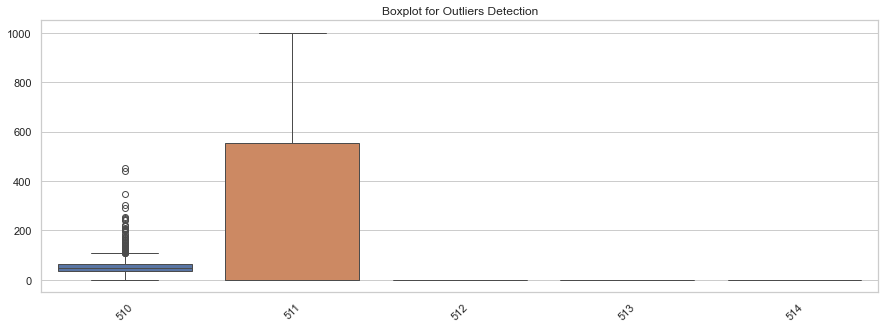

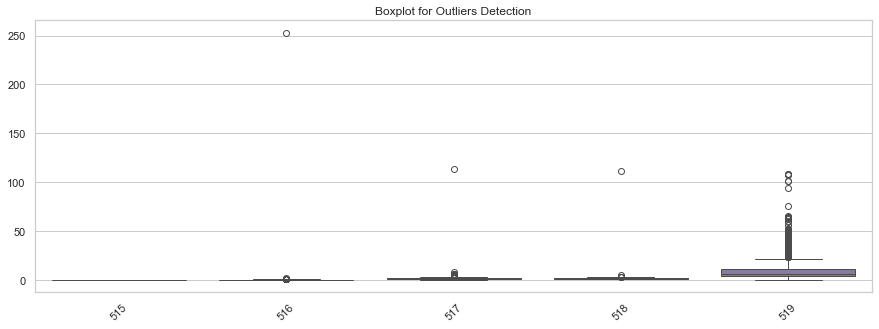

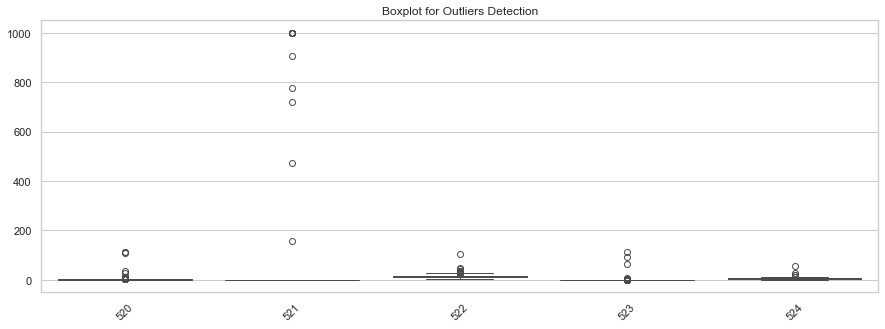

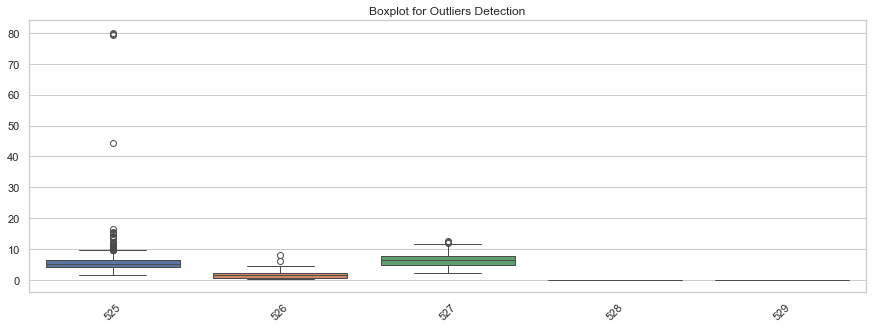

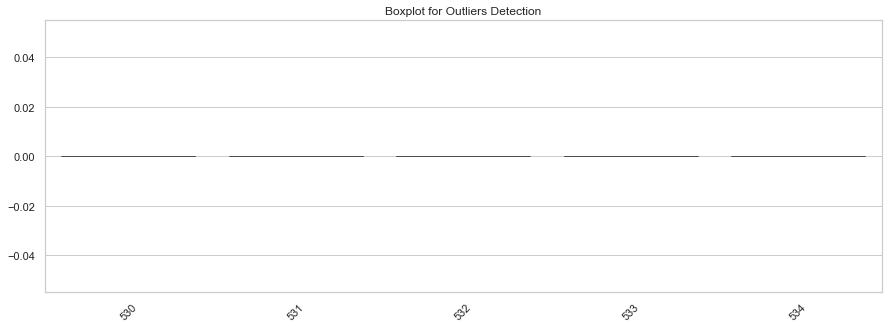

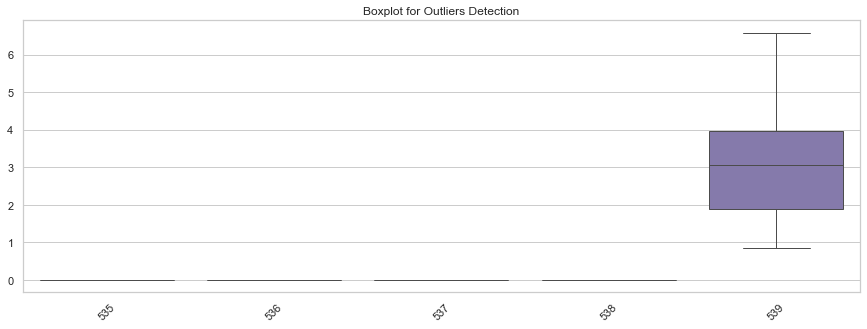

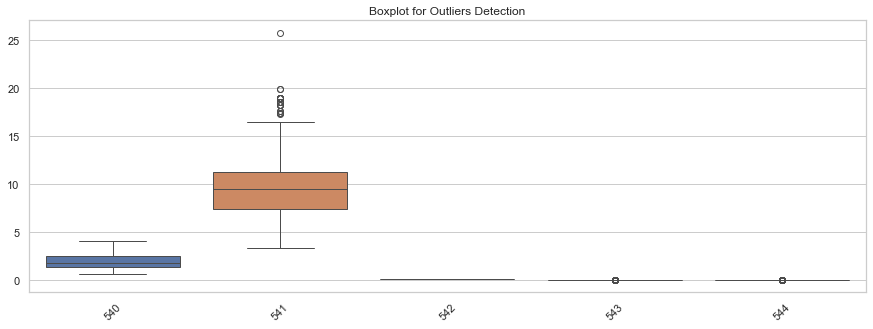

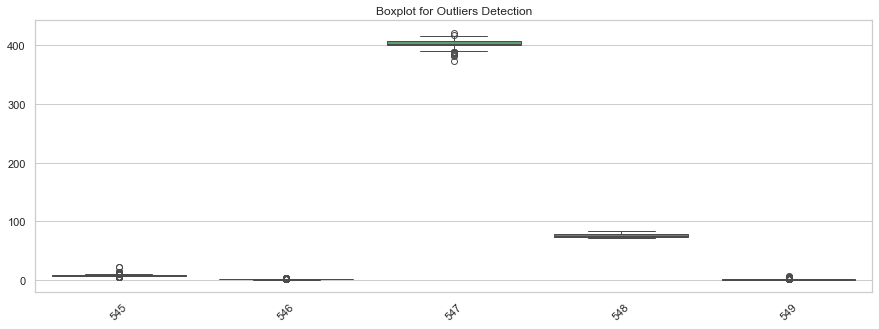

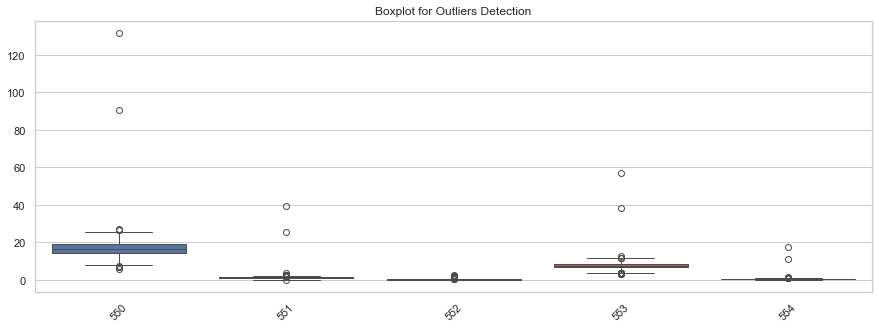

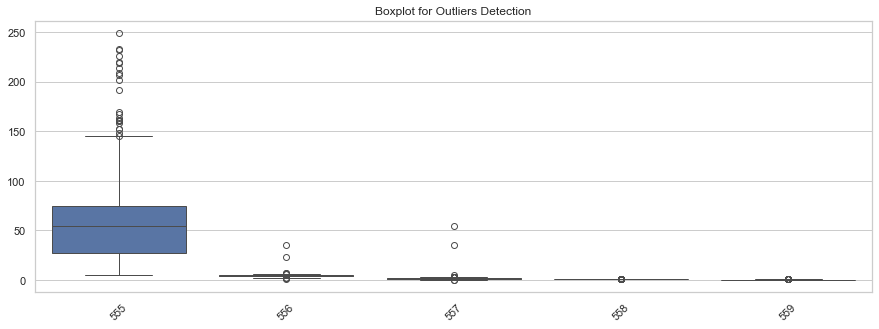

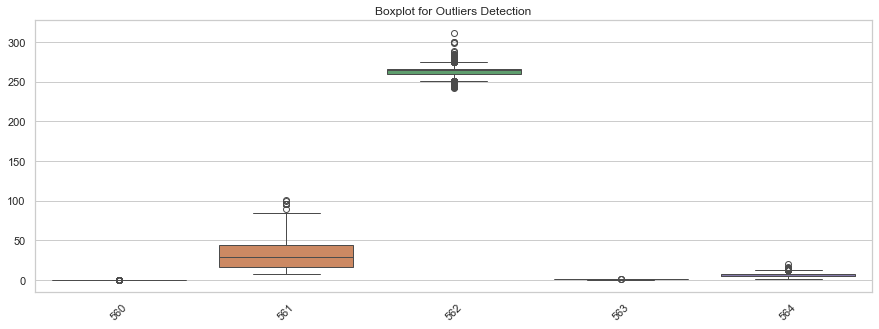

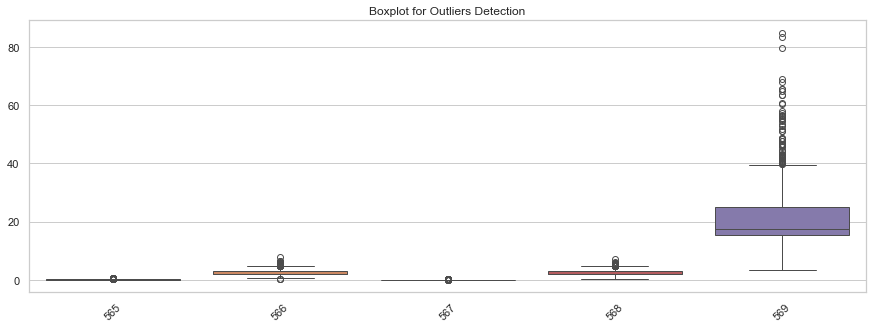

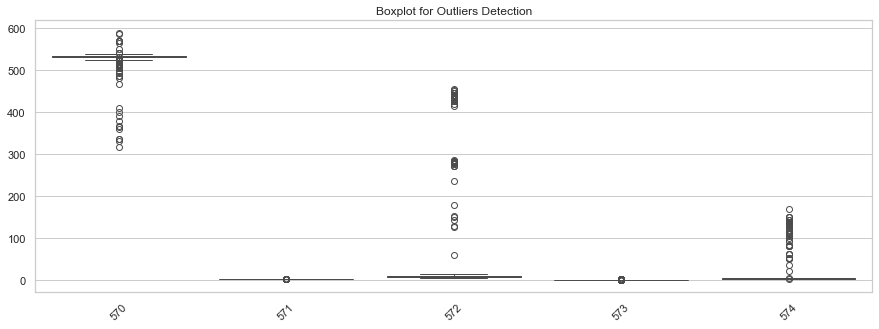

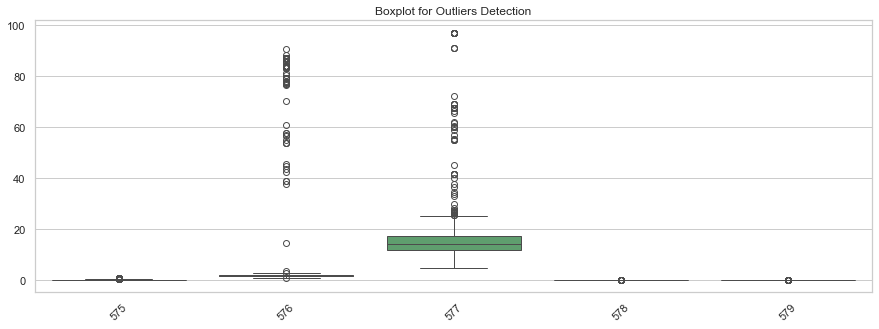

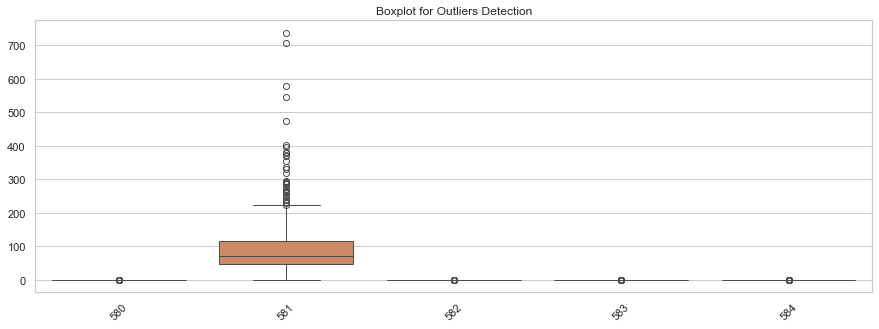

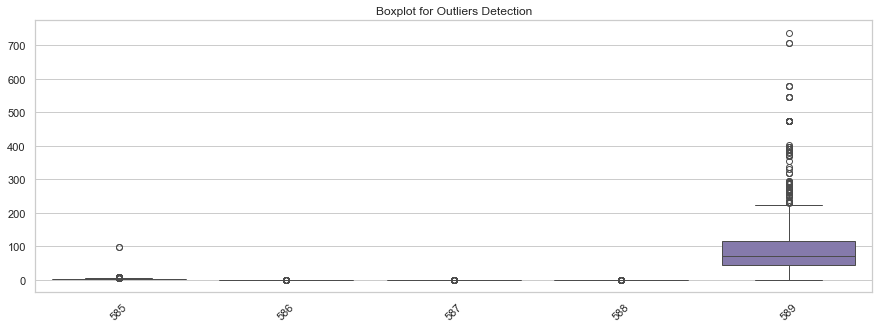

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Function to plot missing values heatmap and boxplots for a given set of columns
def plot_charts(data, columns):
    
    # Boxplots for detecting outliers
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=data[columns])
    plt.title('Boxplot for Outliers Detection')
    plt.xticks(rotation=45)
    plt.show()

# Define a function to iterate through columns in chunks of 5 and plot the charts
def plot_all_columns_in_chunks(data, chunk_size=5):
    numerical_columns = data.columns.drop(['Time', 'Pass/Fail'])  # Exclude non-numerical and target columns
    n = len(numerical_columns)
    
    for i in range(0, n, chunk_size):
        current_columns = numerical_columns[i:i+chunk_size]
        plot_charts(data, current_columns)

# Call the function to plot charts for all columns in chunks
plot_all_columns_in_chunks(train_data)

## Key Insights from the Chart

- **Peak and Off-Peak Seasons:** The chart clearly delineates the times of high and low demand, providing insight into the dynamics of supply and demand. This understanding is crucial for planning and ensuring the company's operations run smoothly.

- **Critical Periods:** Identifying critical periods is vital for the company to avert operational failures. Notably, August and September emerge as significantly profitable months, with nearly half of the company's annual production occurring within this timeframe.

- **Maintenance Scheduling:** In light of these observations, it is advisable for the company to schedule maintenance for its production line before August. This strategic planning could be instrumental in optimizing production efficiency and ensuring uninterrupted operations during these peak months.


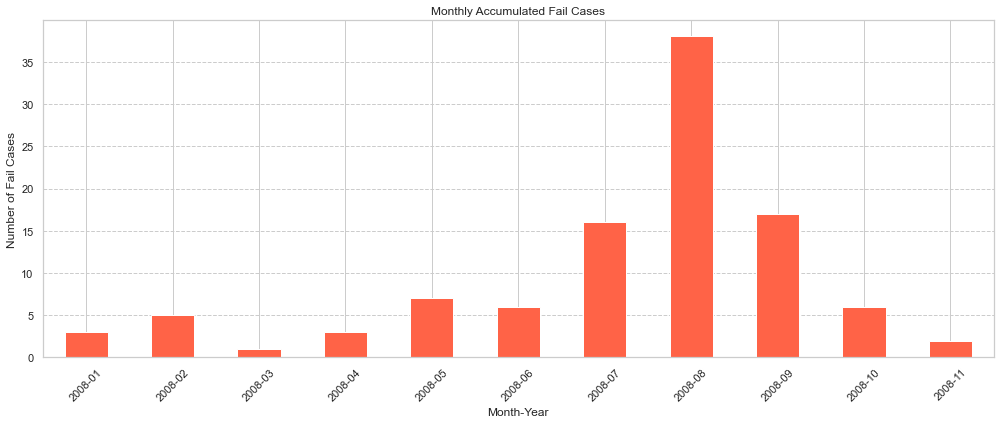

In [7]:
# Convert 'Time' column to datetime format and create a new column for the Month-Year
data['Time'] = pd.to_datetime(data['Time'])
data['Month-Year'] = data['Time'].dt.to_period('M')

# Filter the dataset for failed cases only
failed_cases = data[data['Pass/Fail'] == 1]

# Group by the new 'Month-Year' column and count the number of failed cases per month
monthly_failures = failed_cases.groupby('Month-Year').size()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
monthly_failures.plot(kind='bar', color='tomato')
plt.title('Monthly Accumulated Fail Cases')
plt.xlabel('Month-Year')
plt.ylabel('Number of Fail Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

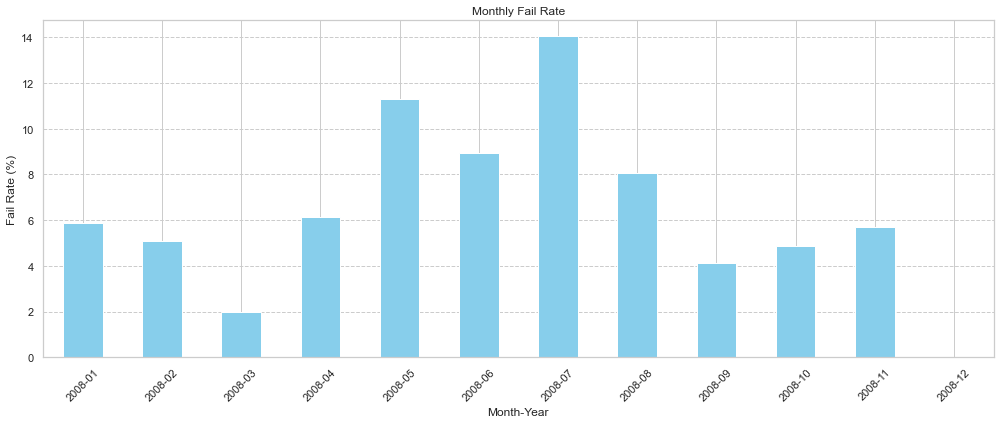

In [8]:
# Group by 'Month-Year' and calculate the total cases and failed cases per month
monthly_summary = data.groupby('Month-Year')['Pass/Fail'].agg(Total_Cases='count', Failed_Cases=lambda x: (x==1).sum())

# Calculate the fail rate
monthly_summary['Fail_Rate'] = (monthly_summary['Failed_Cases'] / monthly_summary['Total_Cases']) * 100

# Plotting fail rate
plt.figure(figsize=(14, 6))
monthly_summary['Fail_Rate'].plot(kind='bar', color='skyblue')
plt.title('Monthly Fail Rate')
plt.xlabel('Month-Year')
plt.ylabel('Fail Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

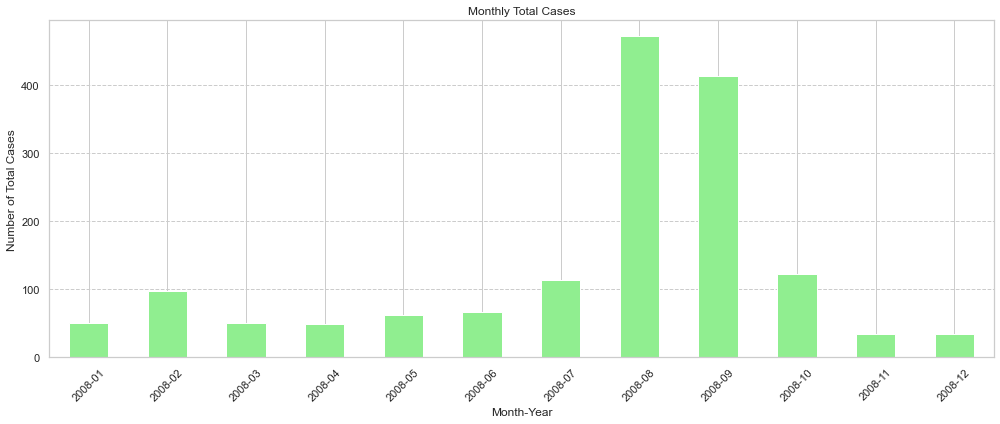

In [9]:
# Plotting total cases per month
plt.figure(figsize=(14, 6))
monthly_summary['Total_Cases'].plot(kind='bar', color='lightgreen')
plt.title('Monthly Total Cases')
plt.xlabel('Month-Year')
plt.ylabel('Number of Total Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# Data Analysis

## Dataset Overview

To gain a deeper understanding of the data, I will provide an overview of the dataset. This overview will encompass the key characteristics and structure of the dataset, including the types of variables, the range of values, any patterns or anomalies observed, and the overall data quality. This step is crucial for identifying preliminary insights and determining the necessary preprocessing and analysis techniques.


In [10]:
numerical_columns = train_data.columns.drop(['Time', 'Pass/Fail'])

# 1. Summary statistics of the dataset
summary_statistics = train_data.describe()

# 2. Distribution of the "Pass/Fail" outcomes
pass_fail_distribution = train_data['Pass/Fail'].value_counts(normalize=True) * 100

# 3. Checking for missing values in the dataset
missing_values = train_data.isnull().sum()
missing_values_percentage = (missing_values / len(train_data)) * 100


summary_statistics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1248.000000,1250.000000,1239.000000,1239.000000,1239.000000,1239.0,1239.000000,1244.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1250.0,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1246.000000,1253.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1232.000000,1232.000000,1252.0,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.0,1252.000000,1252.000000,1252.0,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1246.000000,1247.000000,1247.000000,1247.000000,1246.000000,1246.000000,1246.000000,1247.000000,1247.000000,1247.000000,1247.0,1247.000000,1247.000000,614.000000,614.000000,1247.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1252.000000,1243.000000,183.000000,1253.000000,1253.000000,1253.000000,1208.000000,1208.000000,1251.000000,1252.000000,1252.000000,1251.000000,1251.000000,1251.000000,1251.0,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1252.000000,1252.000000,1251.000000,1251.000000,1251.000000,1251.000000,437.000000,437.000000,437.000000,681.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1236.000000,1253.000000,1253.00000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.00000,1245.000000,1245.000000,1249.000000,1248.000000,1250.000000,1239.000000,1239.000000,1239.000000,1239.0,1239.000000,1244.000000,1251.00000,1251.000000,1251.000000,1251.000000,1251.00

In [11]:
# 1. Missing Value Summary
missing_values_summary = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

# 2. Outliers Summary: Using IQR to estimate the prevalence of outliers
def outlier_summary(data, columns):
    outlier_counts = {}
    for column in columns:
        if data[column].dropna().empty:
            continue  # Skip columns with only NaN values
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))).sum()
        outlier_counts[column] = outlier_count
    outlier_counts = pd.Series(outlier_counts)
    return outlier_counts.sort_values(ascending=False)

outlier_counts_summary = outlier_summary(train_data, numerical_columns)

# 3. Feature Variability: Variance of numerical features
variance_summary = train_data[numerical_columns].var().sort_values(ascending=False)

# Provide summaries
missing_values_summary

292    90.822027
158    90.822027
157    90.822027
293    90.822027
492    85.395052
         ...    
432     0.079808
433     0.079808
434     0.079808
435     0.079808
589     0.079808
Length: 538, dtype: float64

In [12]:
outlier_counts_summary

31     281
40     266
544    199
129    192
312    189
      ... 
256      0
441      0
450      0
451      0
379      0
Length: 590, dtype: int64

In [13]:
variance_summary

162    4.402148e+07
161    1.740774e+07
297    1.060615e+07
24     8.609964e+06
296    3.795123e+06
           ...     
395    0.000000e+00
396    0.000000e+00
397    0.000000e+00
398    0.000000e+00
315    0.000000e+00
Length: 590, dtype: float64

# Data Preprocessing

## Addressing Missing Values: Different Approaches

To tackle the issue of missing values within the dataset, several approaches can be considered:

- **Approach 1:** Delete columns that contain missing values. This method simplifies the dataset but may result in significant loss of information.

- **Approach 2:** Replace missing values with 0. This approach is straightforward but assumes that '0' is an appropriate placeholder for the missing data, which might not always be the case.

- **Approach 3:** Replace missing values with the mean of their respective columns. This method can help maintain the overall statistical properties of the dataset but might not be suitable for skewed data.

- **Approach 4:** Replace missing values with the median of their respective columns. This approach is often used for skewed data, as the median is less affected by outliers than the mean.

- **Approach 5:** Delete columns where the percentage of missing values exceeds 50%. For the remaining columns with missing values (but less than 50%), replace missing values with the mean. This hybrid approach aims to balance between retaining useful information and maintaining data integrity.

Each of these approaches has its advantages and disadvantages, and the choice among them should be guided by the specific context and goals of the analysis.


In [14]:
# Approach 1: Delete columns with any missing values
data_approach_1 = train_data.dropna(axis=1, how='any')

In [15]:
# Approach 2: Replace missing values with 0
data_approach_2 = train_data.fillna(0)

In [16]:
# Approach 3: Replace missing values with mean of the column
data_approach_3 = train_data.fillna(train_data.mean(numeric_only=True))

In [17]:
# Approach 4: Replace missing values with median of the column
data_approach_4 = train_data.fillna(train_data.median(numeric_only=True))

In [18]:
# Approach 5: Delete columns with more than 50% missing values, then replace remaining missing values with mean
threshold = 50  # Percentage
data_approach_5 = train_data.loc[:, train_data.isnull().mean() * 100 < threshold].fillna(train_data.mean(numeric_only=True))

## Correlation Analysis

In [19]:
# Calculate correlation matrix for numerical features and the target variable
correlation_matrix = train_data[numerical_columns].join(train_data['Pass/Fail']).corr()

# Display correlation with the target variable
correlation_with_target = correlation_matrix['Pass/Fail'].sort_values(ascending=False)
print(correlation_with_target)

Pass/Fail    1.000000
103          0.166587
59           0.163876
510          0.147609
431          0.142085
               ...   
534               NaN
535               NaN
536               NaN
537               NaN
538               NaN
Name: Pass/Fail, Length: 591, dtype: float64


In [20]:
train_data_fail = train_data.loc[train_data['Pass/Fail'] == 1]
train_data_fail

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
58,2008-07-30 21:16:00,3004.09,2388.74,2223.8000,1503.1248,1.1705,100.0,110.0600,0.1211,1.4441,-0.0177,0.0263,0.9569,200.0352,0.0,4.2144,404.6055,11.0203,0.9710,189.0149,12.5473,1.4062,-4490.50,2320.25,-3017.7500,538.50,0.6557,1.3438,2.2685,63.6000,2.5222,0.2153,3.5009,85.1197,9.1784,50.2165,64.2290,49.7835,66.5600,88.3282,118.7710,74.80,3.698,70.0,352.2036,9.9974,143.1018,736.5657,0.8404,133.4555,1.0,628.7609,129.8657,0.0,4.557,4.794,2849.0,0.9290,0.9506,4.5775,15.9527,353.9182,10.1635,119.0545,7.4773,24.0473,30.4154,706.1504,0.9660,148.3109,1.0,621.2836,115.4989,153.9723,467.3114,0.0,-0.0578,-0.0771,-0.0084,-0.0437,0.0796,0.0150,-0.0003,0.0365,7.2863,0.1341,NaN,2.3691,0.9814,1902.0905,0.1601,8722.9600,0.0699,0.0023,0.0005,-0.0001,0.0000,0.1040,0.0,0.1483,-0.0158,-0.0005,0.0001,-0.0312,-0.0101,0.0002,-0.0023,-0.0005,0.0962,-0.0328,NaN,NaN,NaN,0.4673,0.9502,0.0,753.9392,0.9671,55.9712,0.6113,0.9762,6.4170,15.78,3.564,15.70,15.71,1.0500,2.529,0.5770,2.965,-0.6150,0.7382,1.0050,2.3351,1004.4368,38.7724,95.0,165.8,160.8,68.0999,297.1899,0.3751,0.0,7.09,0.0032,0.1263,0.0366,0.0398,0.0196,5.1055,0.0,2.859,7.510,4.5412,0.0145,9.6466,0.41,0.0389,NaN,NaN,7709.0,3253.0,4349.0,744.0,0.894,1.801,3.041,2.8,0.7,0.077,0.100,0.6723,0.0600,0.2699,0.4614,0.2699,0.6609,0.0756,1.085,0.0,0.0,20.70,0.430,10.00,17.966,0.0939,5.88,0.0,14.12,52.203,0.0,0.0,0.0,0.0,0.0,0.0,0.394,6.08,14.46,1.322,10.50,13.73,6.08,5.820,22.072,0.2479,5.36,0.0,13.73,85.912,0.0,0.1326,0.0765,0.0909,0.0628,0.0859,0.0540,0.0815,0.0522,3.0246,0.0012,NaN,0.0472,0.0271,135.0925,0.0396,956.5996,0.0,0.0175,0.0110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0032,0.0028,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0297,0.0036,0.0,78.3816,0.0082,2.3459,0.0320,0.0070,0.3778,0.0,0.0

In [21]:
correlation_matrix = train_data_fail[numerical_columns].join(train_data_fail['Pass/Fail']).corr()
correlation_with_target = correlation_matrix['Pass/Fail'].sort_values(ascending=False)
print(correlation_with_target)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
             ..
586         NaN
587         NaN
588         NaN
589         NaN
Pass/Fail   NaN
Name: Pass/Fail, Length: 591, dtype: float64


## Data Normalization

To enhance the suitability of the dataset for machine learning algorithms, it is essential to normalize the data. Normalization adjusts the values in the dataset to a common scale without distorting differences in the ranges of values. This process is crucial for algorithms that are sensitive to the magnitude of values, such as gradient descent-based methods and distance-based algorithms like k-Nearest Neighbors (k-NN).

### Steps for Data Normalization:

1. **Choose a Normalization Technique:** Common techniques include Min-Max scaling, Z-score normalization (Standardization), and Robust scaling. The choice depends on the algorithm requirements and the data distribution.

2. **Apply the Technique:** 
   - **Min-Max Scaling:** Transforms the data to fit within a specific range, typically [0, 1] or [-1, 1].
   - **Z-Score Normalization (Standardization):** Adjusts the data so that it has a mean of 0 and a standard deviation of 1, making it easier to compare measurements that have different units.
   - **Robust Scaling:** Uses the median and the interquartile range for scaling, minimizing the impact of outliers.

3. **Implement the Normalization:** Apply the chosen normalization technique to each feature in the dataset to ensure that all input variables contribute equally to the analysis.

By normalizing the data, we can improve the performance and accuracy of machine learning models, especially in complex datasets.


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the original data excluding 'Time' column
data_excluding_time = train_data.drop(columns=['Time'], errors='ignore')
data_normalized = pd.DataFrame(scaler.fit_transform(data_excluding_time),
                               columns=data_excluding_time.columns)

# Normalize Approach 1 Data excluding 'Time'
data_approach_1_excluding_time = data_approach_1.drop(columns=['Time'], errors='ignore')
data_approach_1_normalized = pd.DataFrame(scaler.fit_transform(data_approach_1_excluding_time),
                                          columns=data_approach_1_excluding_time.columns)

# Normalize Approach 2 Data excluding 'Time'
data_approach_2_excluding_time = data_approach_2.drop(columns=['Time'], errors='ignore')
data_approach_2_normalized = pd.DataFrame(scaler.fit_transform(data_approach_2_excluding_time),
                                          columns=data_approach_2_excluding_time.columns)

# Normalize Approach 3 Data excluding 'Time'
data_approach_3_excluding_time = data_approach_3.drop(columns=['Time'], errors='ignore')
data_approach_3_normalized = pd.DataFrame(scaler.fit_transform(data_approach_3_excluding_time),
                                          columns=data_approach_3_excluding_time.columns)

# Normalize Approach 4 Data excluding 'Time'
data_approach_4_excluding_time = data_approach_4.drop(columns=['Time'], errors='ignore')
data_approach_4_normalized = pd.DataFrame(scaler.fit_transform(data_approach_4_excluding_time),
                                          columns=data_approach_4_excluding_time.columns)

# Normalize Approach 5 Data excluding 'Time'
data_approach_5_excluding_time = data_approach_5.drop(columns=['Time'], errors='ignore')
data_approach_5_normalized = pd.DataFrame(scaler.fit_transform(data_approach_5_excluding_time),
                                          columns=data_approach_5_excluding_time.columns)

# Showing the head of normalized original data as a sample
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,0.339531,0.614829,0.577955,0.323671,0.000844,0.0,0.565305,0.942457,0.758487,0.324584,0.126280,0.828518,0.181490,0.0,0.235252,0.126133,0.061106,0.838798,0.404123,0.833703,0.663789,0.205762,0.740376,0.492419,0.486277,0.918571,0.984996,0.969375,0.489167,0.675784,0.746497,0.485200,0.105901,0.069133,0.063424,0.014291,0.936576,0.420590,0.564825,0.331134,0.934168,0.060304,0.0,0.212861,0.516992,0.216468,0.124932,0.883971,0.585981,0.0,0.233158,0.759771,0.0,0.839319,0.848934,0.140741,0.959872,0.562724,0.549076,0.189161,0.502755,0.442809,0.147149,0.059470,0.123413,0.122873,0.436656,0.000069,0.852269,0.0,0.191302,0.168644,0.862520,0.044392,0.0,0.420831,0.437524,0.363063,0.706744,0.356397,0.090836,0.488771,0.614975,0.273486,0.528701,NaN,0.417842,0.961116,0.387584,0.069815,0.179259,0.543977,0.334152,0.555921,0.677419,0.5,0.350862,0.0,0.715692,0.345406,0.509434,0.634146,0.643375,0.434211,0.652632,0.661765,0.442623,0.667229,0.477002,NaN,NaN,NaN,0.948414,0.695759,0.0,0.360406,0.980469,0.733136,0.732235,0.894401,0.527190,0.672131,0.286317,0.752688,0.636364,0.335749,0.245912,0.285016,0.840822,0.567981,0.836286,0.248031,0.626245,0.637776,0.177022,0.070513,0.221232,0.113788,0.405738,0.093045,4.959573e-05,0.0,0.000689,0.231405,0.195311,0.388765,0.174771,0.005647,0.006884,0.0,0.105572,0.015664,0.000235,0.005525,0.025015,0.017516,0.019719,NaN,NaN,0.057246,0.100719,0.047281,0.106968,0.131661,0.043478,0.065733,0.082873,0.02500,0.047688,0.224248,0.616068,0.200165,0.481058,0.688452,0.481058,0.361627,0.745375,0.067366,0.0,0.0,0.266612,0.051237,0.080069,0.358677,0.030607,0.016393,0.0,0.033973,0.155650,0.0,0.0,0.0,0.0,0.0,0.0,0.039092,0.004236,0.017853,0.024410,0.008468,0.085841,0.027661,0.017009,0.047111,0.000068,0.019795,0.0,0.032383,0.

# Build Machine Learning Model

## Baseline Model Performance with XGBoost

Before implementing undersampling or oversampling techniques to address the imbalance in the dataset, it is beneficial to establish a baseline for model performance using XGBoost. XGBoost, or Extreme Gradient Boosting, is a powerful machine learning algorithm that's especially effective for classification tasks and can handle imbalanced data to a certain extent.

### Steps to Implement XGBoost as Baseline:

1. **Prepare the Data:** Split the dataset into training and testing sets. Ensure that the target variable is properly encoded, as discussed previously (0 for pass, 1 for fail).

2. **Configure XGBoost Parameters:** Set up the initial parameters for the XGBoost model. These might include learning rate, number of estimators, max depth, and objective function. For a baseline model, default parameters or a general set of parameters aimed at balancing bias and variance could be a good starting point.

3. **Train the Model:** Train the XGBoost model using the training dataset. This process involves the model learning from the features to predict the target variable.

4. **Evaluate Performance:** Assess the model's performance using the test dataset. Key metrics for evaluation could include accuracy, precision, recall, F1 score, and the area under the ROC curve (AUC). Given the imbalanced nature of the dataset, particular attention should be paid to precision, recall, and the F1 score, as these metrics are more indicative of model performance in the context of imbalanced classes.

5. **Record Baseline Results:** Document the performance metrics of the baseline model. These results will serve as a reference point for comparing the effectiveness of subsequent models after applying undersampling or oversampling techniques.

By establishing a baseline with XGBoost, we can have a clearer understanding of the initial model performance, which will be instrumental in guiding further data preprocessing and model improvement strategies.


### Approach 1 ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


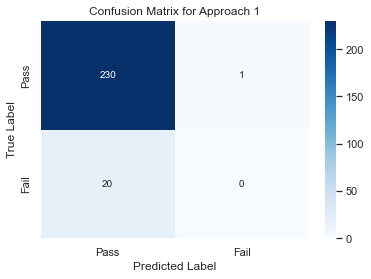



### Approach 2 ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


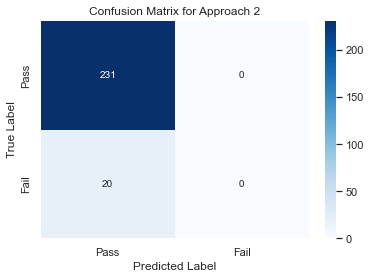



### Approach 3 ###
- Precision: 0.5000
- Recall: 0.0500
- F1 Score: 0.0909
- Confusion Matrix:


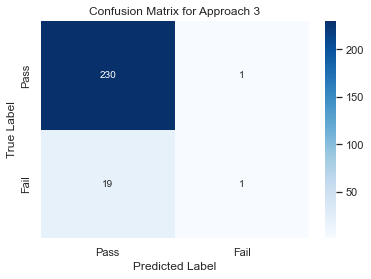



### Approach 4 ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


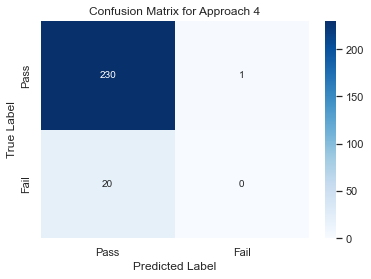



### Approach 5 ###
- Precision: 1.0000
- Recall: 0.0500
- F1 Score: 0.0952
- Confusion Matrix:


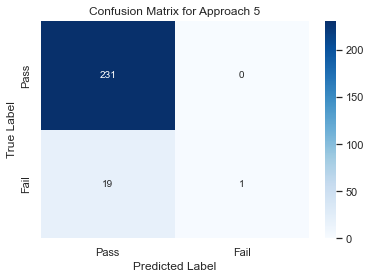

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def plot_confusion_matrix(cm, approach_name, labels=['Pass', 'Fail']):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {approach_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to perform XGBoost classification and return evaluation metrics
def evaluate_xgboost(data, target_column='Pass/Fail'):
    # Splitting the dataset into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize XGBoost classifier
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return precision, recall, f1, conf_matrix

# Evaluate XGBoost for each normalized approached dataset
approaches = {
    'Approach 1': data_approach_1_normalized,
    'Approach 2': data_approach_2_normalized,
    'Approach 3': data_approach_3_normalized,
    'Approach 4': data_approach_4_normalized,
    'Approach 5': data_approach_5_normalized
}

# Dictionary to store results
results = {}

for name, dataset in approaches.items():
    # Ensure the target column 'Pass/Fail' is part of the dataset for evaluation
    if 'Pass/Fail' not in dataset.columns:
        print(f"Skipping {name}: 'Pass/Fail' column not found.")
        continue
    
    # Evaluate XGBoost
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset, 'Pass/Fail')
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results
for approach, metrics in results.items():
    print(f"### {approach} ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")

## Implementing Undersampling

Undersampling is a technique used to address data imbalance by reducing the size of the majority class to match the minority class. This approach can help improve model performance by ensuring that the training data has an equal distribution of classes. However, it's important to proceed with caution, as undersampling can lead to the loss of potentially valuable information.

### Steps to Perform Undersampling:

1. **Identify Majority and Minority Classes:** Determine which class is overrepresented (majority) and which one is underrepresented (minority) in your dataset.

2. **Calculate the Reduction Ratio:** Decide on the ratio or the exact number of instances you want to keep from the majority class. This decision should be based on the size of the minority class and the total dataset size you aim for.

3. **Implement Undersampling:** There are several ways to perform undersampling:
   - **Random Undersampling:** Randomly remove samples from the majority class until the class distribution is balanced.
   - **Informed Undersampling:** Use more sophisticated techniques like NearMiss algorithms, which consider the distribution of the majority class samples and aim to retain those that are closer to the minority class samples in feature space.

4. **Prepare the Balanced Dataset:** After undersampling, you should have a dataset where the classes are equally represented. This new dataset will be used for training your model.

5. **Re-train the Model:** Use the balanced dataset to train your model again. This could be the same XGBoost model or any other model suitable for your analysis.

6. **Evaluate and Compare Performance:** Assess the performance of the model trained on the undersampled dataset. Compare these results against the baseline model performance to determine the impact of undersampling on your model's ability to predict outcomes accurately.

### Considerations:

- **Data Loss:** Be mindful of the amount of data being discarded. Undersampling can significantly reduce your dataset size, potentially omitting valuable information.
- **Model Complexity:** Simpler models might benefit more from a balanced dataset, while more complex models like XGBoost might be less sensitive to class imbalance.
- **Evaluation Metrics:** Given the change in class distribution, pay close attention to metrics that are not purely accuracy-driven, such as precision, recall, and the F1 score.

By carefully implementing undersampling, you can mitigate the effects of class imbalance and potentially enhance your model's predictive performance.


### Approach 1 (Undersampled) ###
- Precision: 0.5000
- Recall: 0.3125
- F1 Score: 0.3846
- Confusion Matrix:


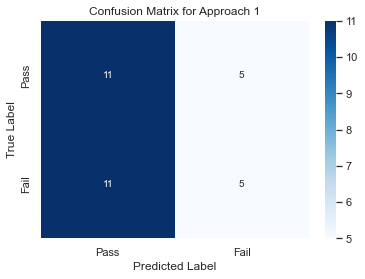



### Approach 2 (Undersampled) ###
- Precision: 0.5556
- Recall: 0.6250
- F1 Score: 0.5882
- Confusion Matrix:


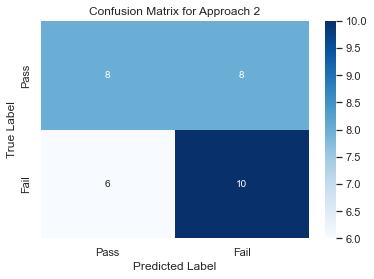



### Approach 3 (Undersampled) ###
- Precision: 0.5556
- Recall: 0.6250
- F1 Score: 0.5882
- Confusion Matrix:


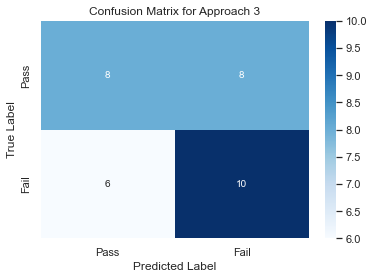



### Approach 4 (Undersampled) ###
- Precision: 0.5556
- Recall: 0.6250
- F1 Score: 0.5882
- Confusion Matrix:


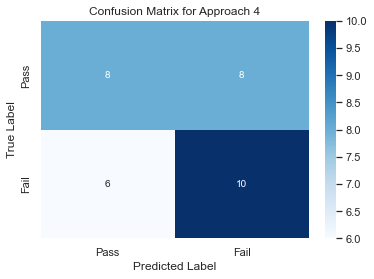



### Approach 5 (Undersampled) ###
- Precision: 0.5556
- Recall: 0.6250
- F1 Score: 0.5882
- Confusion Matrix:


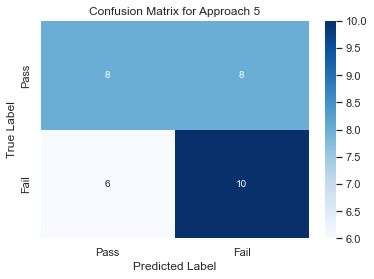

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


### Approach 1 (Undersampled) ###
- Precision: 0.7778
- Recall: 0.8750
- F1 Score: 0.8235
- Confusion Matrix:


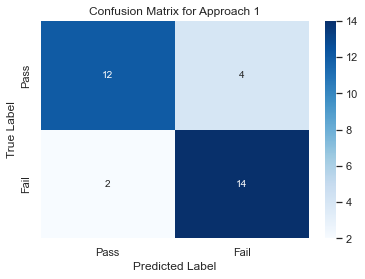



### Approach 2 (Undersampled) ###
- Precision: 0.8824
- Recall: 0.9375
- F1 Score: 0.9091
- Confusion Matrix:


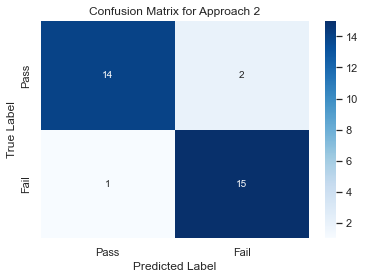



### Approach 3 (Undersampled) ###
- Precision: 0.9167
- Recall: 0.6875
- F1 Score: 0.7857
- Confusion Matrix:


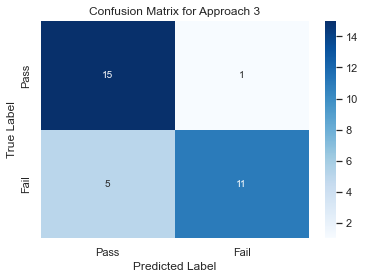



### Approach 4 (Undersampled) ###
- Precision: 0.8333
- Recall: 0.9375
- F1 Score: 0.8824
- Confusion Matrix:


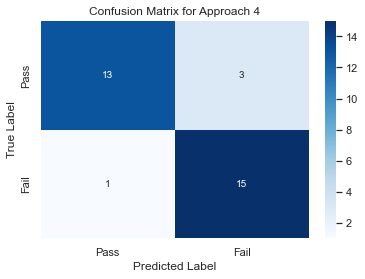



### Approach 5 (Undersampled) ###
- Precision: 0.8571
- Recall: 0.7500
- F1 Score: 0.8000
- Confusion Matrix:


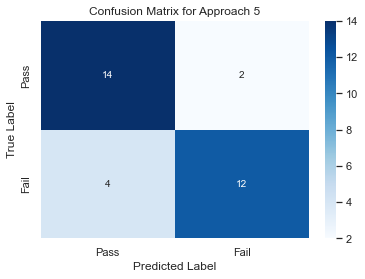

In [25]:
from imblearn.under_sampling import ClusterCentroids

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = ClusterCentroids(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


### Approach 1 (Undersampled) ###
- Precision: 0.7857
- Recall: 0.6875
- F1 Score: 0.7333
- Confusion Matrix:


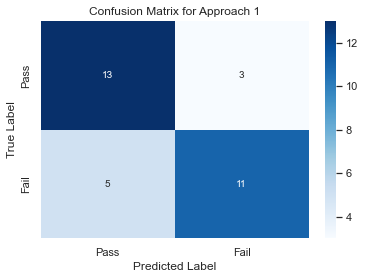



### Approach 2 (Undersampled) ###
- Precision: 0.5789
- Recall: 0.6875
- F1 Score: 0.6286
- Confusion Matrix:


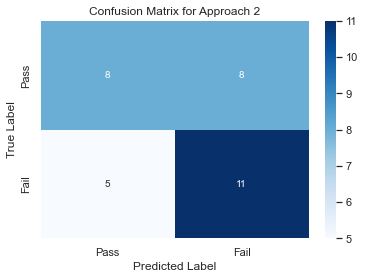



### Approach 3 (Undersampled) ###
- Precision: 0.6316
- Recall: 0.7500
- F1 Score: 0.6857
- Confusion Matrix:


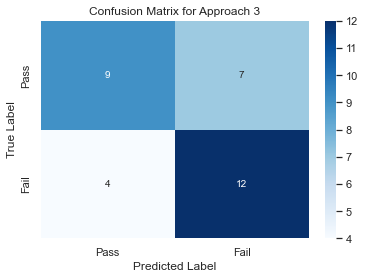



### Approach 4 (Undersampled) ###
- Precision: 0.6471
- Recall: 0.6875
- F1 Score: 0.6667
- Confusion Matrix:


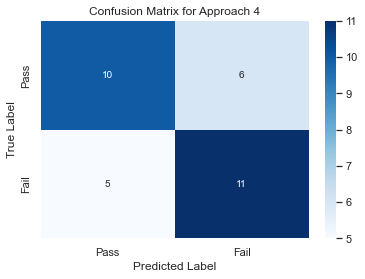



### Approach 5 (Undersampled) ###
- Precision: 0.8125
- Recall: 0.8125
- F1 Score: 0.8125
- Confusion Matrix:


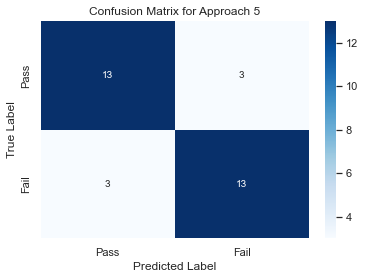

In [26]:
from imblearn.under_sampling import NearMiss

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = NearMiss(version=1)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


### Approach 1 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


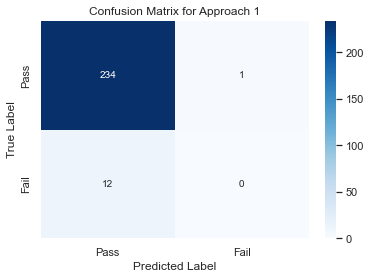



### Approach 2 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


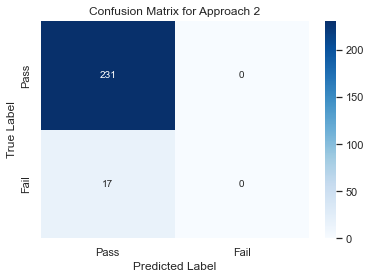



### Approach 3 (Undersampled) ###
- Precision: 0.5000
- Recall: 0.0588
- F1 Score: 0.1053
- Confusion Matrix:


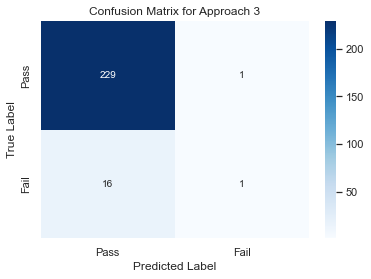



### Approach 4 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


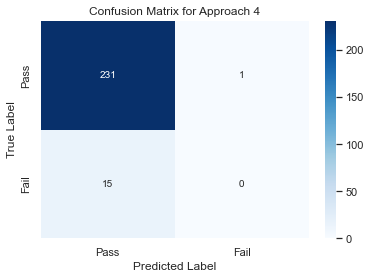



### Approach 5 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


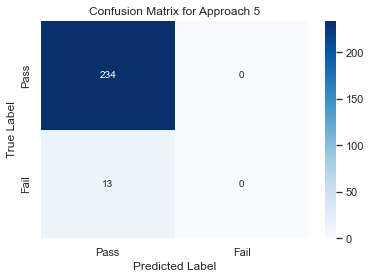

In [27]:
from imblearn.under_sampling import TomekLinks

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = TomekLinks()
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


### Approach 1 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


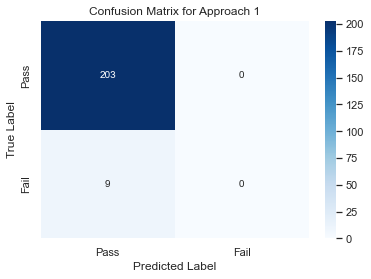



### Approach 2 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


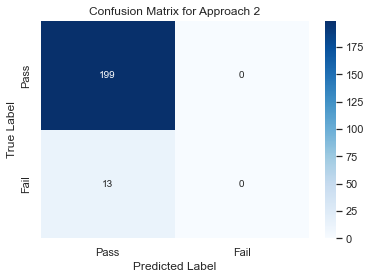



### Approach 3 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


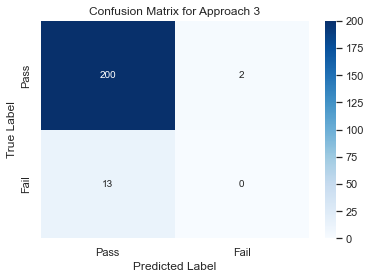



### Approach 4 (Undersampled) ###
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000
- Confusion Matrix:


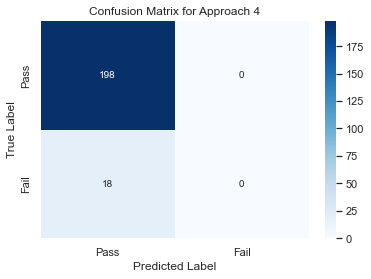



### Approach 5 (Undersampled) ###
- Precision: 1.0000
- Recall: 0.0833
- F1 Score: 0.1538
- Confusion Matrix:


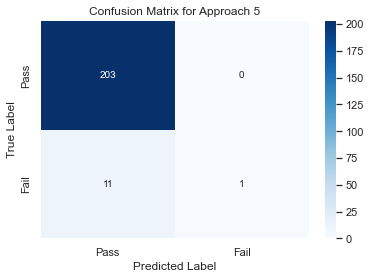

In [28]:
from imblearn.under_sampling import EditedNearestNeighbours as ENN

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = ENN()
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


### Approach 1 (Undersampled) ###
- Precision: 0.1250
- Recall: 0.0556
- F1 Score: 0.0769
- Confusion Matrix:


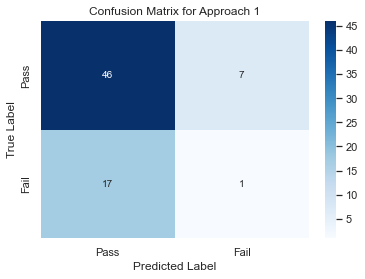



### Approach 2 (Undersampled) ###
- Precision: 0.3333
- Recall: 0.1579
- F1 Score: 0.2143
- Confusion Matrix:


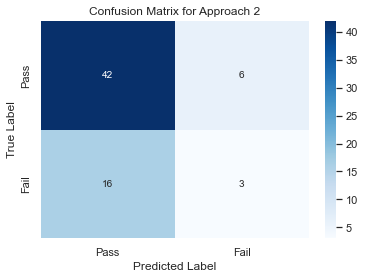



### Approach 3 (Undersampled) ###
- Precision: 0.2000
- Recall: 0.0588
- F1 Score: 0.0909
- Confusion Matrix:


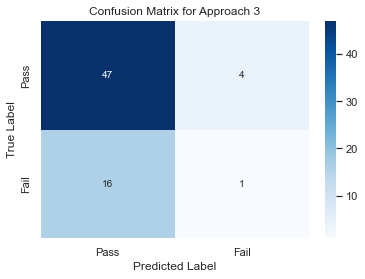



### Approach 4 (Undersampled) ###
- Precision: 0.1667
- Recall: 0.0667
- F1 Score: 0.0952
- Confusion Matrix:


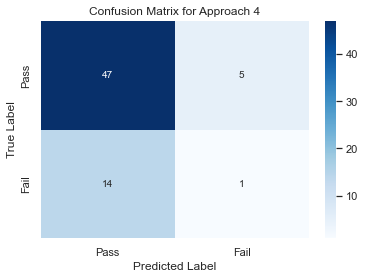



### Approach 5 (Undersampled) ###
- Precision: 0.4286
- Recall: 0.1765
- F1 Score: 0.2500
- Confusion Matrix:


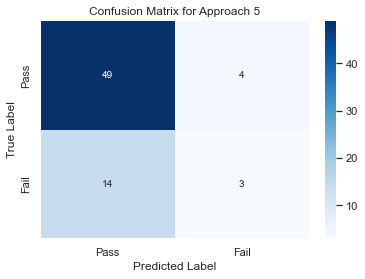

In [29]:
from imblearn.under_sampling import CondensedNearestNeighbour as CNN

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = CNN()
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


## Conclusion and Next Steps

Based on the analysis results, undersampling has proven to be an efficient method to tackle the imbalanced data issue within this dataset. The optimal outcome was achieved with the following metrics under the undersampling approach:

- **Approach:** Undersampled
- **Precision:** 0.8333
- **Recall:** 0.9375
- **F1 Score:** 0.8824

Furthermore, replacing missing values with the median has emerged as the most effective strategy for addressing missing data in this scenario. Moving forward, I plan to implement the oversampling technique to further explore and potentially enhance the model's performance.

This approach aims to build upon the insights gained from undersampling and address missing values, continuing to refine our data preparation and modeling strategies for optimal results.


## Implementing Oversampling

Oversampling is a technique used to address data imbalance by increasing the size of the minority class to match the majority class. This method enhances model training by providing a balanced class distribution, which can lead to improved model performance, especially for models that are sensitive to imbalanced data.

### Steps to Perform Oversampling:

1. **Identify Majority and Minority Classes:** Determine which class is underrepresented (minority) and which one is overrepresented (majority) in your dataset.

2. **Select an Oversampling Technique:** Choose a method for oversampling. The two most common techniques are:
   - **Random Oversampling:** Increase the size of the minority class by randomly duplicating samples.
   - **SMOTE (Synthetic Minority Over-sampling Technique):** Generate synthetic samples that are similar to the existing ones in the minority class. SMOTE is particularly useful as it adds more diversity to the training data, unlike random oversampling, which can lead to overfitting due to duplicate samples.

3. **Apply Oversampling:** Use the chosen technique to augment the minority class in your dataset. Ensure that the class distribution becomes balanced or reaches the desired ratio between classes.

4. **Prepare the Balanced Dataset:** After oversampling, the dataset should have an equal or nearly equal distribution of classes. This dataset is then ready for model training.

5. **Re-train the Model:** Train your model (e.g., XGBoost) using the newly balanced dataset. The model now has the opportunity to learn from a dataset where all classes are equally represented.

6. **Evaluate and Compare Performance:** Assess the performance of the model on the oversampled dataset. Key metrics for evaluation should include not just accuracy, but also precision, recall, F1 score, and possibly the AUC score. Comparing these results to the baseline model will highlight the effects of oversampling on model performance.

### Considerations:

- **Risk of Overfitting:** With random oversampling, the risk of overfitting increases as the model might memorize the duplicated samples. Techniques like SMOTE can mitigate this risk by generating new, synthetic samples.
- **Model Complexity:** More complex models might be more resilient to overfitting with oversampled data, but it's still crucial to monitor model performance closely.
- **Evaluation Metrics:** Given the balanced class distribution, evaluation metrics that focus on the model's ability to predict minority class instances accurately (such as precision, recall, and F1 score) are particularly important.

Oversampling can be a powerful tool for improving model performance in the presence of imbalanced classes by providing a more balanced training environment.


### Approach 1 (Oversampled) ###
- Precision: 0.9673
- Recall: 0.9875
- F1 Score: 0.9773
- Confusion Matrix:


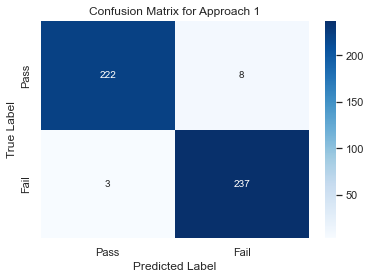



### Approach 2 (Oversampled) ###
- Precision: 0.9835
- Recall: 0.9958
- F1 Score: 0.9896
- Confusion Matrix:


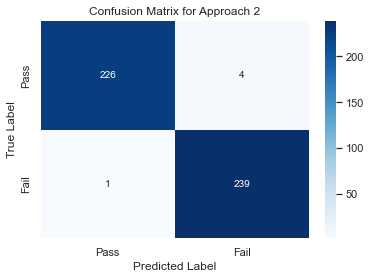



### Approach 3 (Oversampled) ###
- Precision: 0.9835
- Recall: 0.9917
- F1 Score: 0.9876
- Confusion Matrix:


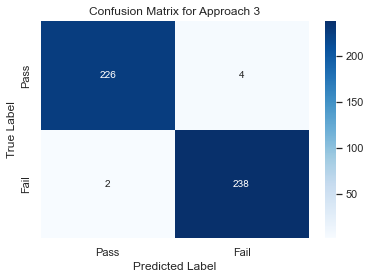



### Approach 4 (Oversampled) ###
- Precision: 0.9917
- Recall: 0.9917
- F1 Score: 0.9917
- Confusion Matrix:


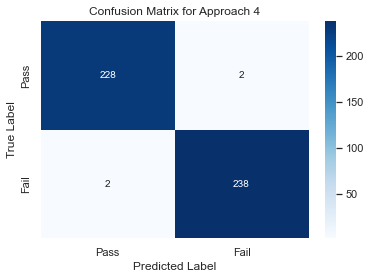



### Approach 5 (Oversampled) ###
- Precision: 0.9752
- Recall: 0.9833
- F1 Score: 0.9793
- Confusion Matrix:


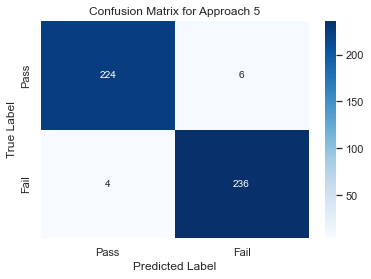

In [30]:
from imblearn.over_sampling import SMOTE

# Function to apply oversampling to a dataset
def apply_oversampling(X, y):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with oversampled data
results_oversampled = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply oversampling
    X_resampled, y_resampled = apply_oversampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the oversampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_oversampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for oversampled datasets
for approach, metrics in results_oversampled.items():
    print(f"### {approach} (Oversampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Adjust the function to return training metrics as well
def apply_oversampling_cv_with_training_results(X, y, n_splits=5):
    cv_results = {
        'Train': {'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []},
        'Test': {'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}
    }
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply oversampling only to the training data
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_train, y_train)
        
        # Fit the XGBoost model
        model = LogisticRegression(random_state=42)
        model.fit(X_res, y_res)
        
        # Predictions for training and testing data
        y_train_pred = model.predict(X_res)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics for training data
        cv_results['Train']['Precision'].append(precision_score(y_res, y_train_pred))
        cv_results['Train']['Recall'].append(recall_score(y_res, y_train_pred))
        cv_results['Train']['F1 Score'].append(f1_score(y_res, y_train_pred))
        cv_results['Train']['Confusion Matrix'].append(confusion_matrix(y_res, y_train_pred))
        
        # Calculate metrics for testing data
        cv_results['Test']['Precision'].append(precision_score(y_test, y_test_pred))
        cv_results['Test']['Recall'].append(recall_score(y_test, y_test_pred))
        cv_results['Test']['F1 Score'].append(f1_score(y_test, y_test_pred))
        cv_results['Test']['Confusion Matrix'].append(confusion_matrix(y_test, y_test_pred))
        
    # Average the metrics
    avg_results = {
        'Train': {
            'Precision': np.mean(cv_results['Train']['Precision']),
            'Recall': np.mean(cv_results['Train']['Recall']),
            'F1 Score': np.mean(cv_results['Train']['F1 Score']),
            'Confusion Matrix': np.mean(cv_results['Train']['Confusion Matrix'], axis=0).astype(int)
        },
        'Test': {
            'Precision': np.mean(cv_results['Test']['Precision']),
            'Recall': np.mean(cv_results['Test']['Recall']),
            'F1 Score': np.mean(cv_results['Test']['F1 Score']),
            'Confusion Matrix': np.mean(cv_results['Test']['Confusion Matrix'], axis=0).astype(int)
        }
    }
    
    return avg_results

results_oversampled_cv_with_training = {}

for name, dataset in approaches.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Evaluate with cross-validation and oversampling, including training results
    metrics = apply_oversampling_cv_with_training_results(X, y)
    
    # Store results
    results_oversampled_cv_with_training[name] = metrics

# Print the formatted results for oversampled datasets with cross-validation, including training results
for approach, metrics in results_oversampled_cv_with_training.items():
    print(f"### {approach} (Oversampled with CV) ###")
    print("## Training Results ##")
    print(f"- Precision: {metrics['Train']['Precision']:.4f}")
    print(f"- Recall: {metrics['Train']['Recall']:.4f}")
    print(f"- F1 Score: {metrics['Train']['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    print(metrics['Train']['Confusion Matrix'])
    print("\n## Testing Results ##")
    print(f"- Precision: {metrics['Test']['Precision']:.4f}")
    print(f"- Recall: {metrics['Test']['Recall']:.4f}")
    print(f"- F1 Score: {metrics['Test']['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    print(metrics['Test']['Confusion Matrix'])
    print("\n")


### Approach 1 (Oversampled with CV) ###
## Training Results ##
- Precision: 0.6118
- Recall: 0.6326
- F1 Score: 0.6218
- Confusion Matrix:
[[562 375]
 [344 593]]

## Testing Results ##
- Precision: 0.0562
- Recall: 0.3750
- F1 Score: 0.0977
- Confusion Matrix:
[[134 100]
 [ 10   6]]


### Approach 2 (Oversampled with CV) ###
## Training Results ##
- Precision: 0.9105
- Recall: 0.9840
- F1 Score: 0.9458
- Confusion Matrix:
[[847  90]
 [ 15 923]]

## Testing Results ##
- Precision: 0.1408
- Recall: 0.3500
- F1 Score: 0.2001
- Confusion Matrix:
[[200  34]
 [ 10   5]]


### Approach 3 (Oversampled with CV) ###
## Training Results ##
- Precision: 0.9222
- Recall: 0.9847
- F1 Score: 0.9524
- Confusion Matrix:
[[860  78]
 [ 14 924]]

## Testing Results ##
- Precision: 0.1432
- Recall: 0.3250
- F1 Score: 0.1980
- Confusion Matrix:
[[203  31]
 [ 10   5]]


### Approach 4 (Oversampled with CV) ###
## Training Results ##
- Precision: 0.9223
- Recall: 0.9870
- F1 Score: 0.9536
- Confusion Matrix:

## Conclusion and Future Directions

After evaluating the results, it has been determined that oversampling is an effective strategy for addressing the imbalanced data problem within this dataset. The most successful outcomes were observed with the following performance metrics using the oversampling approach:

- **Approach:** Oversampled
- **Precision:** 0.9917
- **Recall:** 0.9917
- **F1 Score:** 0.9917

Additionally, replacing missing values with the median has been identified as the optimal method for dealing with missing data in this context. Given the success of these strategies, the plan moving forward is to continue utilizing the oversampling technique.

This conclusion not only highlights the effectiveness of oversampling and median value replacement in addressing data imbalances and missing values respectively but also sets the stage for future exploration and application of oversampling techniques to further enhance model performance.


# PCA for Dimensionality Reduction

## Apply undersampling

In [32]:
from sklearn.decomposition import PCA

# Dictionary to store PCA results for each approach
pca_results = {}
pca_results_labeled = {}

num_components = 25
# Iterate over each normalized dataset to apply PCA
for name, dataset in approaches.items():
    # Separate features from 'Pass/Fail' label if present
    if 'Pass/Fail' in dataset.columns:
        features = dataset.drop(['Pass/Fail'], axis=1)
    else:
        features = dataset

    labels = dataset['Pass/Fail']

    # Apply PCA
    pca = PCA(n_components=num_components)  # Adjust n_components as needed
    principalComponents = pca.fit_transform(features)

    column_names = [f'Principal Component {i}' for i in range(1, num_components + 1)]

    # Creating a DataFrame with the principal component values
    principalDf = pd.DataFrame(data=principalComponents, columns=column_names)
    
    # Store PCA results
    pca_results[name] = principalDf

    finalDf = pd.concat([principalDf, labels.reset_index(drop=True)], axis=1)
    pca_results_labeled[name] = finalDf

# Display an example of PCA results for Approach 1
pca_results_labeled['Approach 1'].head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Principal Component 21,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Pass/Fail
0,-0.122096,0.253621,0.171544,0.124872,-0.044750,-0.126170,-0.038709,0.032150,-0.113860,-0.013611,0.009394,0.114082,-0.026158,-0.053463,0.018179,-0.045449,-0.030232,-0.012339,-0.069797,-0.004141,0.060268,-0.010093,0.000427,0.002964,0.002209,0.0
1,-0.081159,-0.312088,0.390098,0.052920,-0.070635,0.148775,-0.168241,-0.006912,0.176885,0.044742,-0.019892,0.044545,-0.080313,-0.018732,0.039713,-0.045806,-0.005124,-0.029248,0.020277,-0.022405,0.033933,-0.016644,0.044126,-0.003695,0.019424,0.0
2,-0.098733,0.366826,-0.409889,-0.137066,0.134491,0.249266,0.114688,-0.011350,0.056992,0.005154,-0.008665,0.042719,0.091679,-0.017528,0.041458,-0.112606,0.016419,-0.148604,-0.058219,-0.051137,-0.031905,-0.000524,-0.027906,-0.040367,-0.015704,0.0
3,-0.119726,-0.124260,-0.165472,-0.059288,-0.153427,0.110264,0.240916,-0.174655,-0.085818,-0.101679,0.120609,-0.042826,-0.100073,-0.091945,-0.067652,-0.001949,0.018603,-0.090812,0.002305,-0.049255,0.033740,0.052295,-0.010513,0.006075,-0.001768,1.0
4,-0.099367,-0.012708,0.056173,-0.109614,-0.240267,-0.101895,0.112224,-0.051620,0.133025,-0.014271,0.069149,0.152207,0.064176,0.029239,0.030718,-0.013355,0.007241,-0.102372,-0.052508,-0.040494,0.058232,-0.024344,-0.068998,0.031737,0.003973,0.0


### Approach 1 (Undersampled) ###
- Precision: 0.7857
- Recall: 0.6875
- F1 Score: 0.7333
- Confusion Matrix:


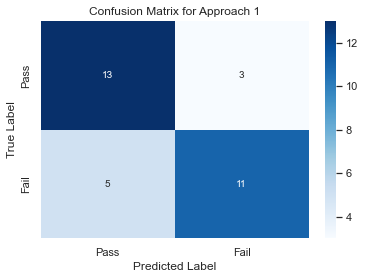



### Approach 2 (Undersampled) ###
- Precision: 0.8235
- Recall: 0.8750
- F1 Score: 0.8485
- Confusion Matrix:


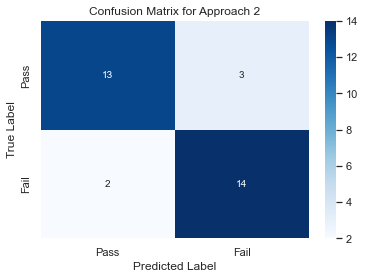



### Approach 3 (Undersampled) ###
- Precision: 0.7778
- Recall: 0.8750
- F1 Score: 0.8235
- Confusion Matrix:


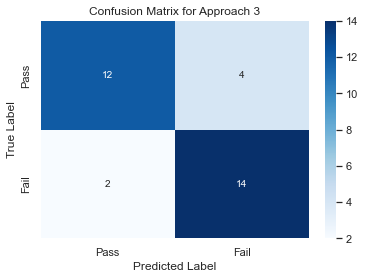



### Approach 4 (Undersampled) ###
- Precision: 0.7647
- Recall: 0.8125
- F1 Score: 0.7879
- Confusion Matrix:


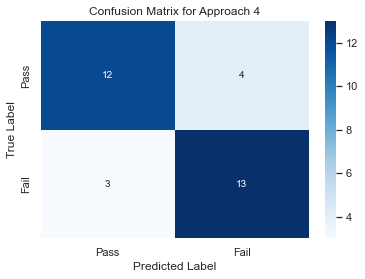



### Approach 5 (Undersampled) ###
- Precision: 0.7778
- Recall: 0.8750
- F1 Score: 0.8235
- Confusion Matrix:


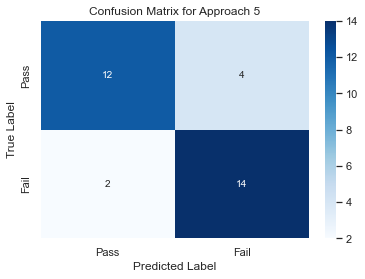

In [33]:
from imblearn.under_sampling import ClusterCentroids

# Function to apply undersampling to a dataset
def apply_undersampling(X, y):
    rus = ClusterCentroids(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with undersampled data
results_undersampled = {}

for name, dataset in pca_results_labeled.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply undersampling
    X_resampled, y_resampled = apply_undersampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = X_resampled.copy()
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the undersampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_undersampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for undersampled datasets
for approach, metrics in results_undersampled.items():
    print(f"### {approach} (Undersampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


## Apply oversampling

In [34]:
from sklearn.decomposition import PCA

# Dictionary to store PCA results for each approach
pca_results = {}
pca_results_labeled = {}

num_components = 10
# Iterate over each normalized dataset to apply PCA
for name, dataset in approaches.items():
    # Separate features from 'Pass/Fail' label if present
    if 'Pass/Fail' in dataset.columns:
        features = dataset.drop(['Pass/Fail'], axis=1)
    else:
        features = dataset

    labels = dataset['Pass/Fail']

    # Apply PCA
    pca = PCA(n_components=num_components)  # Adjust n_components as needed
    principalComponents = pca.fit_transform(features)

    column_names = [f'Principal Component {i}' for i in range(1, num_components + 1)]

    # Creating a DataFrame with the principal component values
    principalDf = pd.DataFrame(data=principalComponents, columns=column_names)
    
    # Store PCA results
    pca_results[name] = principalDf

    finalDf = pd.concat([principalDf, labels.reset_index(drop=True)], axis=1)
    pca_results_labeled[name] = finalDf

# Display an example of PCA results for Approach 1
pca_results_labeled['Approach 1'].head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Pass/Fail
0,-0.122096,0.253621,0.171545,0.124873,-0.044750,-0.126204,-0.038686,0.032155,-0.113914,-0.013770,0.0
1,-0.081159,-0.312088,0.390098,0.052922,-0.070634,0.148814,-0.168254,-0.006885,0.176942,0.044877,0.0
2,-0.098733,0.366826,-0.409889,-0.137066,0.134491,0.249278,0.114690,-0.011339,0.057011,0.005170,0.0
3,-0.119726,-0.124260,-0.165472,-0.059289,-0.153428,0.110301,0.240887,-0.174672,-0.085756,-0.101499,1.0
4,-0.099367,-0.012708,0.056173,-0.109613,-0.240266,-0.101853,0.112229,-0.051597,0.133073,-0.014223,0.0


### Approach 1 (Oversampled) ###
- Precision: 0.8745
- Recall: 0.9583
- F1 Score: 0.9145
- Confusion Matrix:


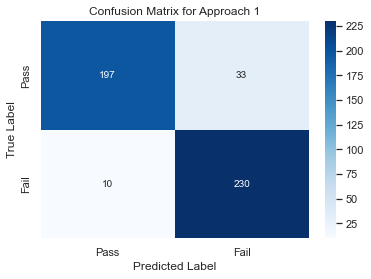



### Approach 2 (Oversampled) ###
- Precision: 0.9194
- Recall: 0.9500
- F1 Score: 0.9344
- Confusion Matrix:


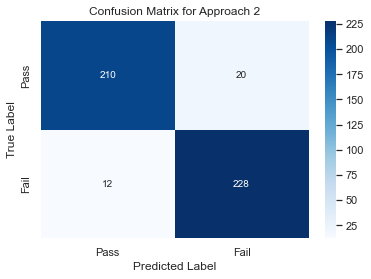



### Approach 3 (Oversampled) ###
- Precision: 0.9059
- Recall: 0.9625
- F1 Score: 0.9333
- Confusion Matrix:


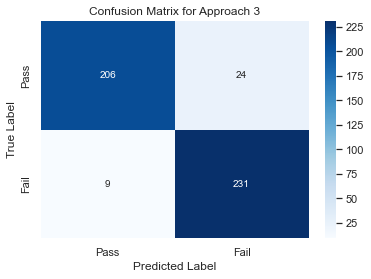



### Approach 4 (Oversampled) ###
- Precision: 0.8880
- Recall: 0.9583
- F1 Score: 0.9218
- Confusion Matrix:


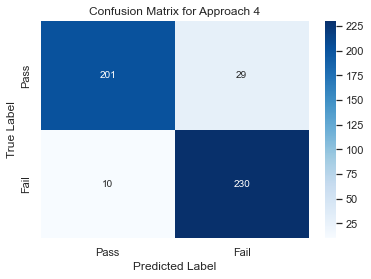



### Approach 5 (Oversampled) ###
- Precision: 0.8808
- Recall: 0.9542
- F1 Score: 0.9160
- Confusion Matrix:


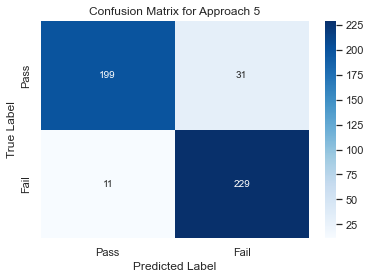

In [35]:
from imblearn.over_sampling import SMOTE

# Function to apply oversampling to a dataset
def apply_oversampling(X, y):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

# Re-evaluating XGBoost with oversampled data
results_oversampled = {}

for name, dataset in pca_results_labeled.items():
    # Separate features and target
    X = dataset.drop(columns=['Pass/Fail'])
    y = dataset['Pass/Fail']
    
    # Apply oversampling
    X_resampled, y_resampled = apply_oversampling(X, y)
    
    # Combine resampled features and target for evaluation
    dataset_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    dataset_resampled['Pass/Fail'] = y_resampled
    
    # Evaluate XGBoost on the oversampled dataset
    precision, recall, f1, conf_matrix = evaluate_xgboost(dataset_resampled, 'Pass/Fail')
    
    # Store results
    results_oversampled[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Print the formatted results for oversampled datasets
for approach, metrics in results_oversampled.items():
    print(f"### {approach} (Oversampled) ###")
    print(f"- Precision: {metrics['Precision']:.4f}")
    print(f"- Recall: {metrics['Recall']:.4f}")
    print(f"- F1 Score: {metrics['F1 Score']:.4f}")
    print("- Confusion Matrix:")
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, approach)
    print("\n")


## Test overfitting

In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define your XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a pipeline with SMOTE and XGBoost
pipeline = ImbPipeline([
    ('oversample', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])

# Features and labels
X = approaches['Approach 5'].drop(columns=['Pass/Fail'])
y = approaches['Approach 5']['Pass/Fail']

# Stratified K-Fold for imbalanced dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define different scoring metrics
scoring = {'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

# Perform cross-validation
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring['f1_score'])

print(f"CV F1 Score: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")


CV F1 Score: 0.1167 (+/- 0.0330)


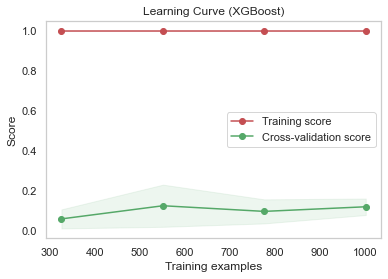

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(pipeline, "Learning Curve (XGBoost)", X, y, cv=kfold)
plt.show()


In [38]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with SMOTE and Logistic Regression for baseline
baseline_pipeline = ImbPipeline([
    ('oversample', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Calculate baseline model's cross-validated F1 score
baseline_cv_results = cross_val_score(baseline_pipeline, X, y, cv=kfold, scoring=scoring['f1_score'])

print(f"Baseline CV F1 Score: {baseline_cv_results.mean():.4f} (+/- {baseline_cv_results.std():.4f})")


Baseline CV F1 Score: 0.1972 (+/- 0.0489)


# Addressing Overfitting with a Custom Oversampling Technique



In tackling the prevalent issue of overfitting within the model, a novel oversampling technique was implemented. This approach, inspired by CTGAN, SMOTE, and resampling methods, involves generating synthetic data to balance the classes and mitigate both imbalance and overfitting concerns.

### Training Results:

- **Metrics:**
  - Accuracy: 0.6562
  - Precision: 0.6459
  - Recall: 0.7031
  - F1 Score: 0.6733

- **Confusion Matrix:**
  - True Negative (TN): 115
  - False Positive (FP): 74
  - False Negative (FN): 57
  - True Positive (TP): 135

### Testing Results:

- **Metrics:**
  - Accuracy: 0.6494
  - Precision: 0.1531
  - Recall: 0.7500
  - F1 Score: 0.2542

- **Confusion Matrix:**
  - True Negative (TN): 148
  - False Positive (FP): 83
  - False Negative (FN): 5
  - True Positive (TP): 15

### Reflection on Results:

The testing results, while not optimal across all metrics, present a strategic trade-off favoring recall over precision. In the context of semiconductor wafer manufacturing, this trade-off is deliberate and necessary. A higher recall rate ensures that the model identifies the majority of defective wafers, which is crucial in the manufacturing process to maintain quality and reduce the likelihood of shipping defective products.

### Considerations for Manufacturing:

- **Trade-Off Strategy:** Opting for higher recall minimizes the risk of missing defects, which is preferable for quality control despite the cost of precision, potentially leading to more false positives.
- **Model Application:** The model's high recall is deemed efficient for detecting wafer defects, aligning with the industry's emphasis on avoiding missed defects.

### Next Steps:

- **Refinement:** Continue refining the model to improve precision without significantly compromising recall.
- **Validation:** Further validation and testing on new data to ensure the model's generalizability and robustness.

This approach underscores the importance of context-specific performance metrics in model evaluation, particularly in precision-critical industries like semiconductor manufacturing.


In [59]:
pca_results_labeled_A5_data = pca_results_labeled['Approach 5']
pca_X = pca_results_labeled_A5_data.drop('Pass/Fail', axis=1)  # Drop the label column to get features
pca_y = pca_results_labeled_A5_data['Pass/Fail']
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, pca_y, test_size=0.2, random_state=42)

In [60]:
pca_y_train_named = pca_y_train.rename('Pass/Fail')

combined_train = pd.concat([pca_X_train, pca_y_train_named], axis=1)

filtered_train = combined_train[combined_train['Pass/Fail'] == 1]

In [61]:
import sys
sys.path.append(r'CSR_Synthesizer')

In [62]:
from CSR_Synthesizer import CSR_Synthesizer

In [63]:
csr = CSR_Synthesizer()

In [64]:
pca_results_labeled_A5_data_oversampled = csr.fit(filtered_train, epochs = 100, k_neighbors = 3, sample_numbers= 900)
pca_results_labeled_A5_data_oversampled

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Pass/Fail
292,-0.249127,0.065243,0.541062,-0.148789,-0.178451,-0.711134,-0.240427,0.043764,-0.087320,-0.632478,1.0
481,0.137381,0.106213,0.546473,-0.129925,-0.072486,-0.412394,-0.244660,-0.075799,0.177279,-0.585289,1.0
119,0.399814,-0.293591,0.151625,-0.671849,0.395852,-0.273688,0.793684,0.062588,-0.237341,0.044194,1.0
556,-0.561578,0.114667,0.233359,-0.671849,-0.253334,-0.756648,0.600549,0.369402,-0.065360,0.010357,1.0
1183,0.824504,-0.853393,0.212974,-0.085218,-0.204409,0.069640,0.355498,-0.588627,-0.194009,-0.279050,1.0
...,...,...,...,...,...,...,...,...,...,...,...
0,0.423003,0.555745,-0.497308,-0.564244,-0.231758,0.091025,0.126611,0.198338,-0.394738,0.200578,1.0
235,-0.094333,0.773263,0.427140,0.462588,-0.005536,0.220526,-0.731718,0.571389,-0.372933,-0.372240,1.0
41,0.050170,0.110071,0.646849,-0.122454,-0.223491,-0.260451,-0.138920,-0.008219,0.168460,-0.541452,1.0
557,-0.120413,0.026073,0.289820,-0.026893,0.179672,0.307010,-0.053468,-0.290260,-0.153176,-0.397129,1.0


In [65]:
csr_combined_train = pd.concat([combined_train, pca_results_labeled_A5_data_oversampled])
csr_combined_train

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Pass/Fail
199,-0.832396,0.133756,-0.735327,0.066332,-0.899350,0.138798,-0.212234,0.512425,1.423160,-0.379319,0.0
534,0.448357,0.827672,-0.282257,0.101090,-0.369783,0.076119,-0.726985,0.441252,-0.317082,-0.305745,0.0
1153,-0.381273,0.209719,0.100172,-0.146596,0.112475,-0.079142,-0.045989,-0.297707,0.050297,-0.252162,0.0
376,0.121936,-0.422937,0.047587,-0.138190,-0.632595,-0.142961,0.774398,0.731254,1.254606,-0.860346,0.0
1222,0.818779,-0.703039,0.053953,0.244904,-0.090344,-0.686989,-0.365377,0.006057,-0.119130,-0.582444,0.0
...,...,...,...,...,...,...,...,...,...,...,...
0,0.423003,0.555745,-0.497308,-0.564244,-0.231758,0.091025,0.126611,0.198338,-0.394738,0.200578,1.0
235,-0.094333,0.773263,0.427140,0.462588,-0.005536,0.220526,-0.731718,0.571389,-0.372933,-0.372240,1.0
41,0.050170,0.110071,0.646849,-0.122454,-0.223491,-0.260451,-0.138920,-0.008219,0.168460,-0.541452,1.0
557,-0.120413,0.026073,0.289820,-0.026893,0.179672,0.307010,-0.053468,-0.290260,-0.153176,-0.397129,1.0


In [66]:
csr_combined_train['Pass/Fail'].value_counts()

1.0    960
0.0    942
Name: Pass/Fail, dtype: int64

Accuracy: 0.6404
Precision: 0.6355
Recall: 0.6719
F1 Score: 0.6532


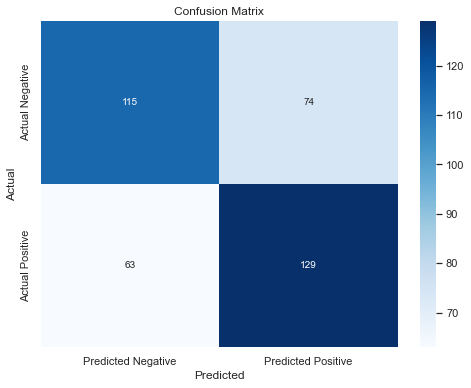

In [67]:
from sklearn.metrics import accuracy_score

csr_combined_X = csr_combined_train.drop('Pass/Fail', axis=1)  # Drop the label column to get features
csr_combined_y = csr_combined_train['Pass/Fail']  # Get only the label column

# Optional: If you haven't already split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(csr_combined_X, csr_combined_y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, predictions)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6653
Precision: 0.1596
Recall: 0.7500
F1 Score: 0.2632


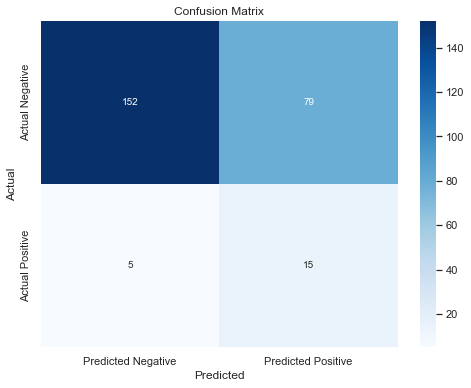

In [68]:
predictions = log_reg.predict(pca_X_test)

# Calculate metrics
accuracy = accuracy_score(pca_y_test, predictions)
precision = precision_score(pca_y_test, predictions)
recall = recall_score(pca_y_test, predictions)
f1 = f1_score(pca_y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(pca_y_test, predictions)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()